PowerCo Customer Churn Prediction

Problem Definition

Customer churn is a significant challenge for PowerCo, as it represents the loss of customers to competitors. The costs associated with acquiring new customers often exceed those of retaining existing ones, making it crucial to minimise churn. The ability to accurately predict customer churn can provide ConnectTel with insights into which customers are likely to leave, enabling the company to implement targeted retention strategies.

A churn prediction system will allow PowerCo to:

Identify At-Risk Customers: By analysing client data and behavioural patterns, the system can flag customers who are more likely to cancel their service. Early identification enables powerCo to focus efforts on retaining these customers before they churn.

Improve Customer Retention: With timely predictions, Powerco can deploy personalised interventions, such as offering discounts, tailored service packages, or improved customer support, to retain high-value customers.

Optimise Marketing Spend: Instead of casting a wide net with general retention campaigns, PowerCo can precisely target resources on customers who are likely to churn, maximising the return on investment for retention initiatives.

Enhance Long-Term Customer Loyalty: By proactively addressing the needs and concerns of at-risk customers, PowerCo can strengthen customer relationships and reduce churn rates, thus maintaining a competitive edge in the Power industry.

In [1]:
## Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('/kaggle/input/data-files/client_data.csv')
price_df = pd.read_csv('/kaggle/input/data-files/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [4]:
price_df.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

The datatype of `date_activ, date_end, date_modif_prod and date_renewal` is object, so we need to convert them to datetime.



In [6]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]

In [7]:
for i in date:
    client_df[i] = pd.to_datetime(client_df[i])

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [12]:
print(client_df.shape)
print(price_df.shape)

(14606, 26)
(193002, 8)


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [13]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [14]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

## Missing Data

In [15]:
pd.DataFrame({"Missing value (%)": client_df.isnull().sum()/len(client_df.index)*100})

Missing value (%)
id                                            0.0
channel_sales                                 0.0
cons_12m                                      0.0
cons_gas_12m                                  0.0
cons_last_month                               0.0
date_activ                                    0.0
date_end                                      0.0
date_modif_prod                               0.0
date_renewal                                  0.0
forecast_cons_12m                             0.0
forecast_cons_year                            0.0
forecast_discount_energy                      0.0
forecast_meter_rent_12m                       0.0
forecast_price_energy_off_peak                0.0
forecast_price_energy_peak                    0.0
forecast_price_pow_off_peak                   0.0
has_gas                                       0.0
imp_cons                                      0.0
margin_gross_pow_ele                          0.0
margin_net_pow_ele                            0.0
nb_prod_act                                   0.0
net_margin                                    0.0
num_years_antig                               0.0
origin_up                                     0.0
pow_max                                       0.0
churn                                         0.0

In [16]:
pd.DataFrame({"Missing value (%)": price_df.isnull().sum()/len(price_df.index)*100})

Missing value (%)
id                                0.0
price_date                        0.0
price_off_peak_var                0.0
price_peak_var                    0.0
price_mid_peak_var                0.0
price_off_peak_fix                0.0
price_peak_fix                    0.0
price_mid_peak_fix                0.0

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [17]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

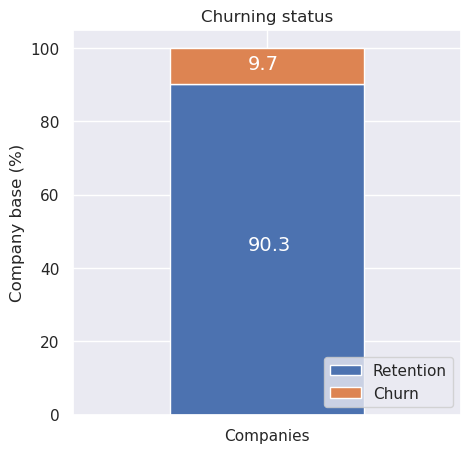

In [18]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

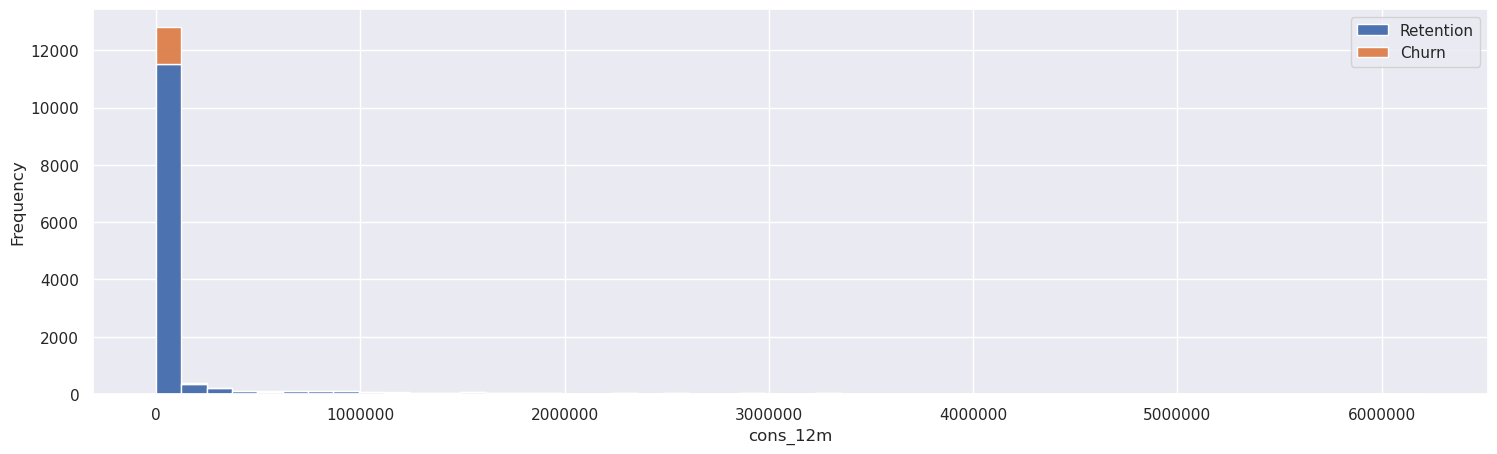

In [19]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

About **10%** of total customers have **churned**, it is imbalanced dataset, so in the modeling process, we need to handle this problem.

**Sale Channels**

Sale channels can play an important role in customer's rentation or churn. Some strong sale channels can create quality and loyal customers.

In [20]:
channel=client_df[['id', 'channel_sales', 'churn']]

In [21]:
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [22]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

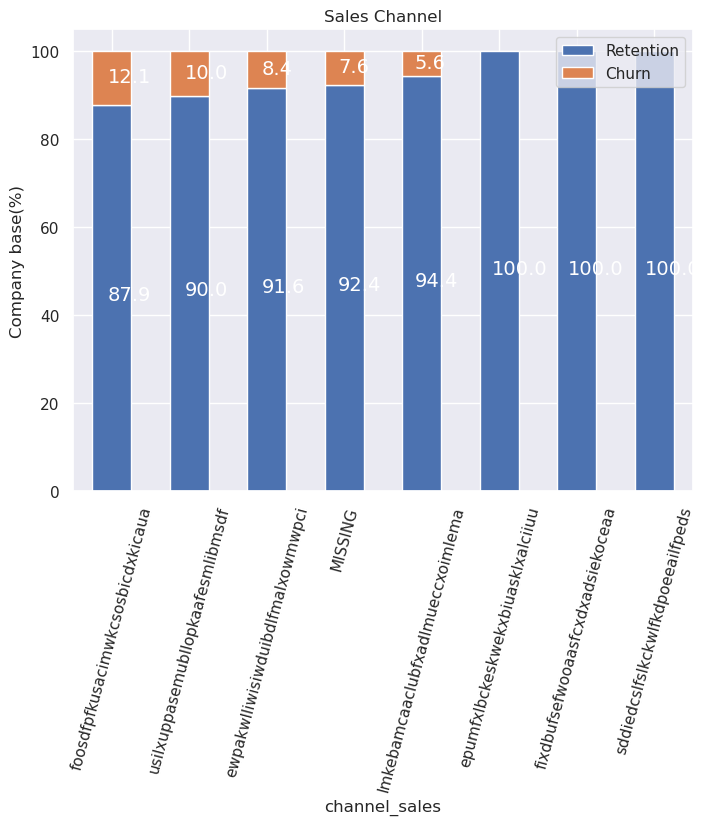

In [23]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')
plt.show()

There are 5 Sale channels having churn rate.

**Consumption**

Now, we will see the consumption of customers during the last month and 12 months againt the churn. Because this is a numeric - categorical comparison therefore we can use histogram distribution or box plot visualization.

In [24]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]

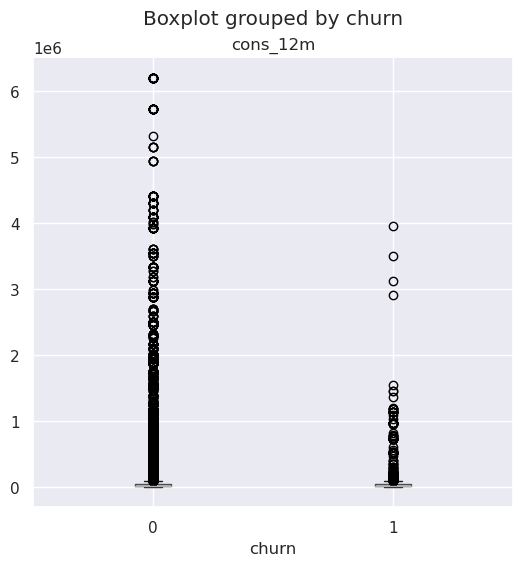

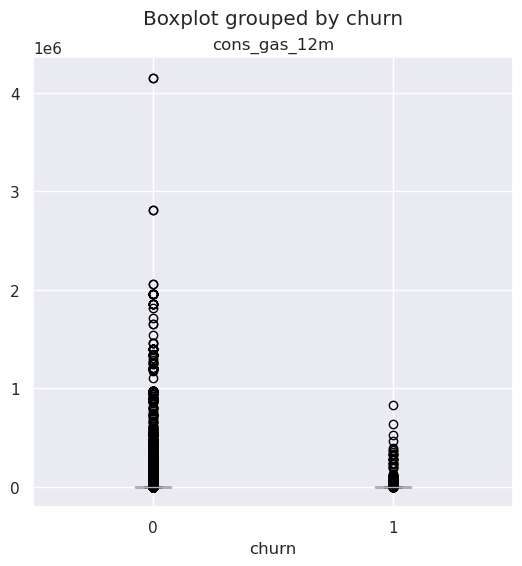

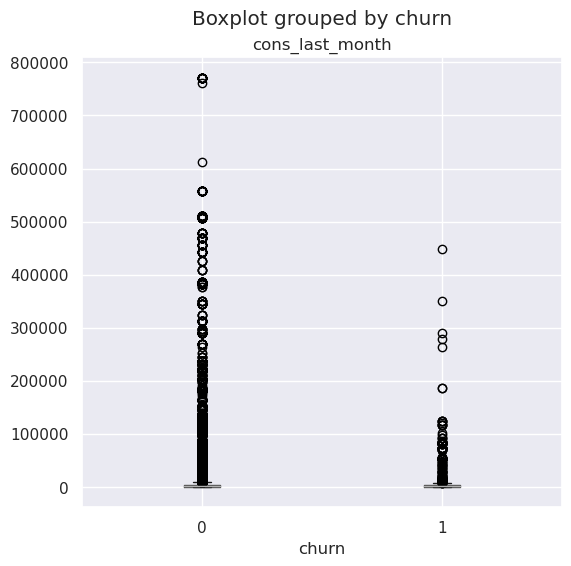

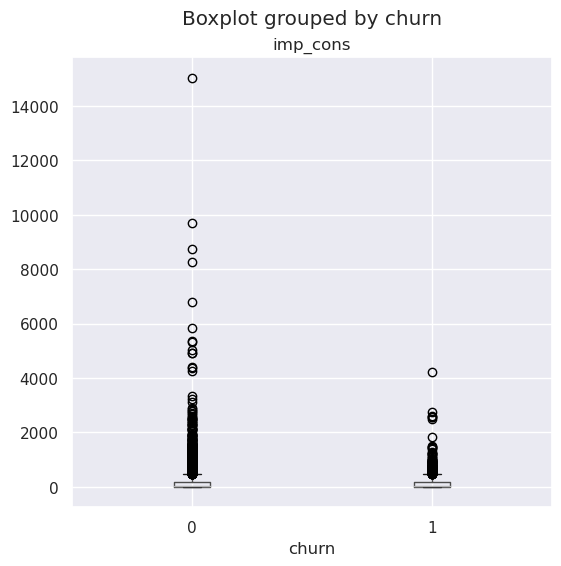

In [25]:
for col in consumption:
    client_df.boxplot(column = col, by = 'churn', figsize = (6,6))
    plt.title(col)
    
plt.show()

We will create a **plot_distribution** function to see the spread and skewness of the data.

In [26]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

In [27]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

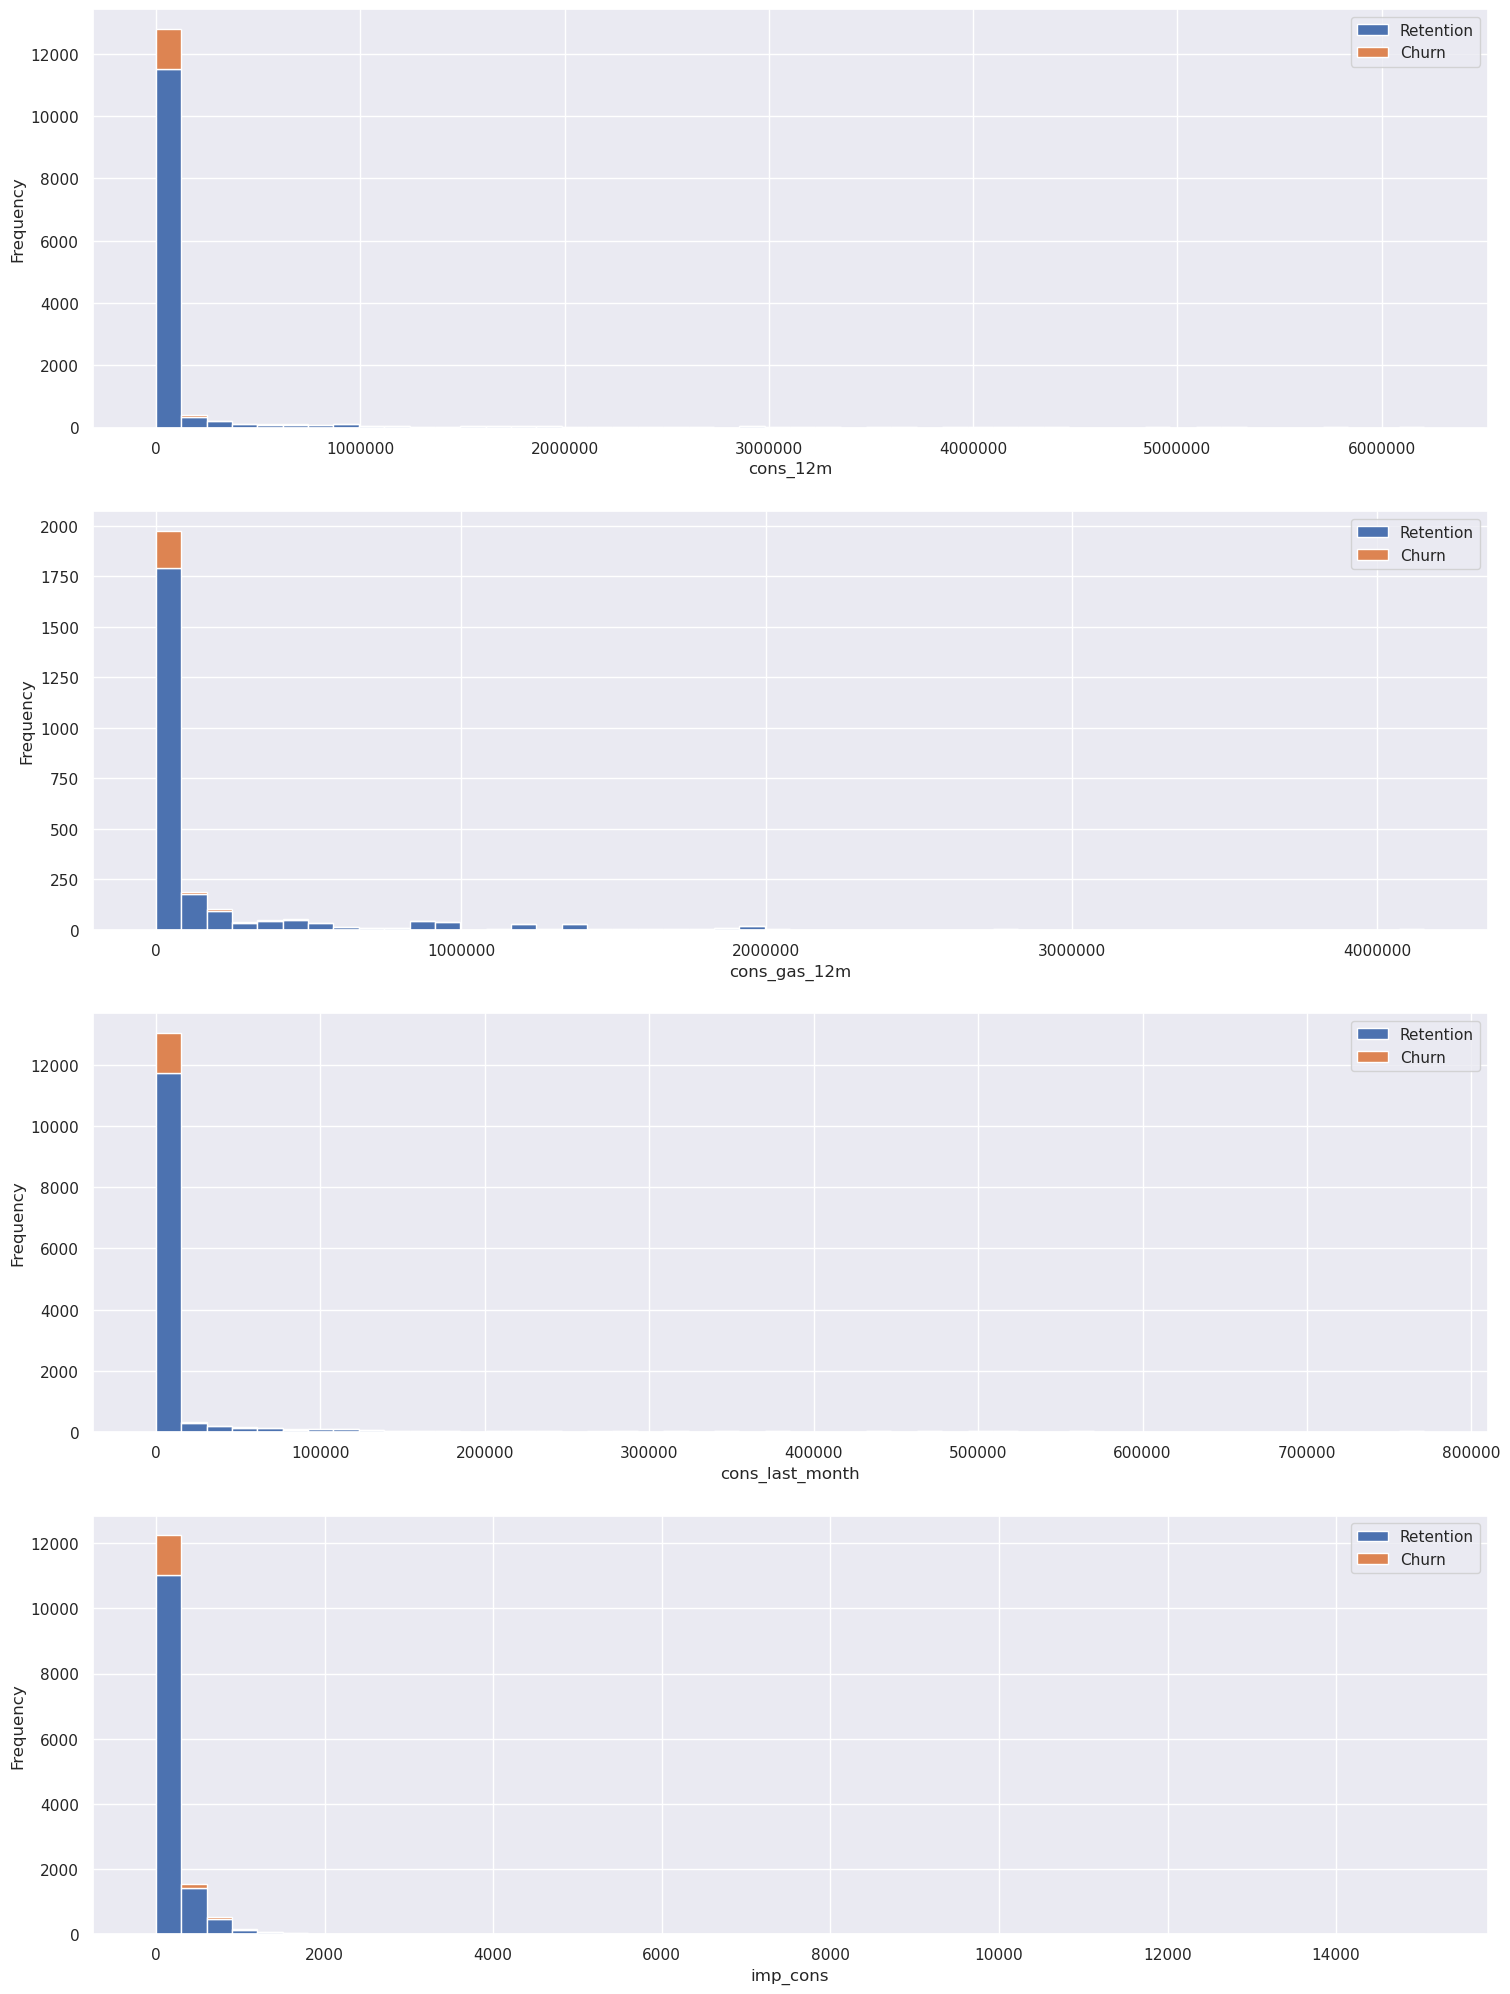

In [28]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

There are a lot of outliers at the upper in the dataset and it is highly positive skewed. we'll address skewness and outliers in the feature engineering.

**Forecast**

In [29]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

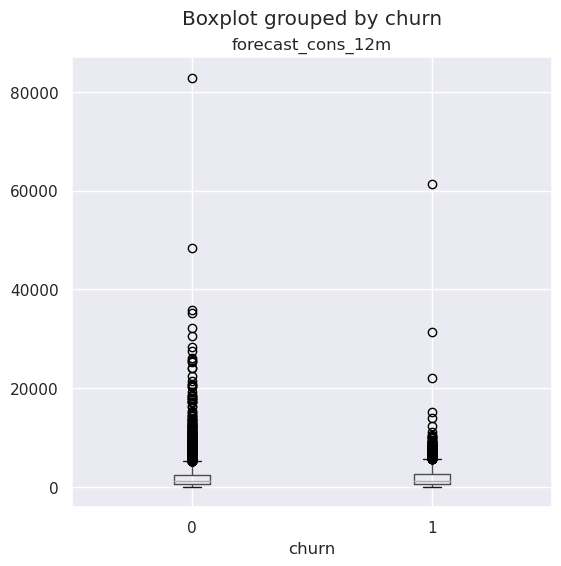

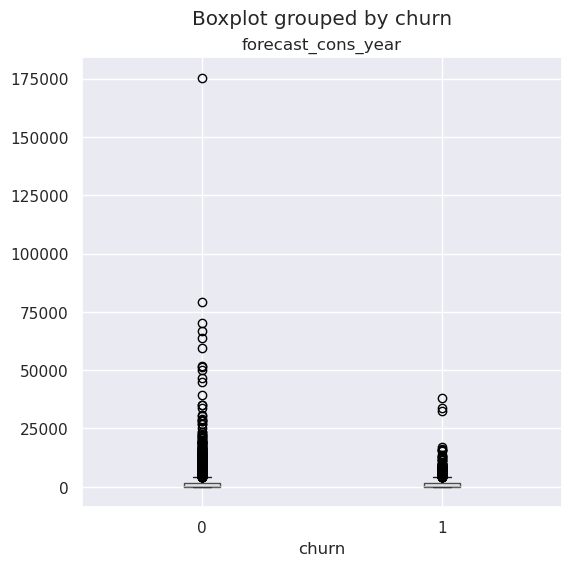

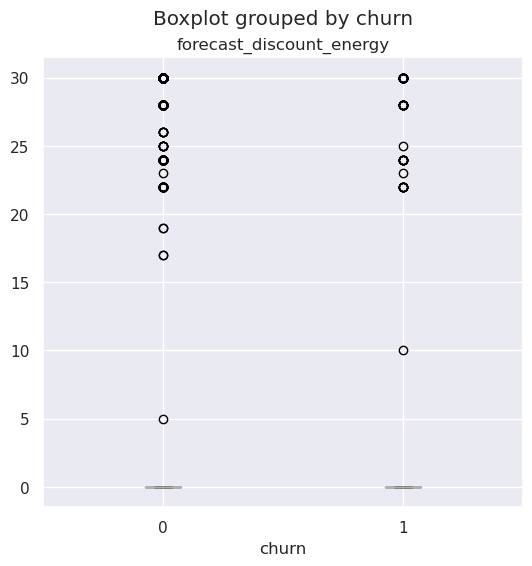

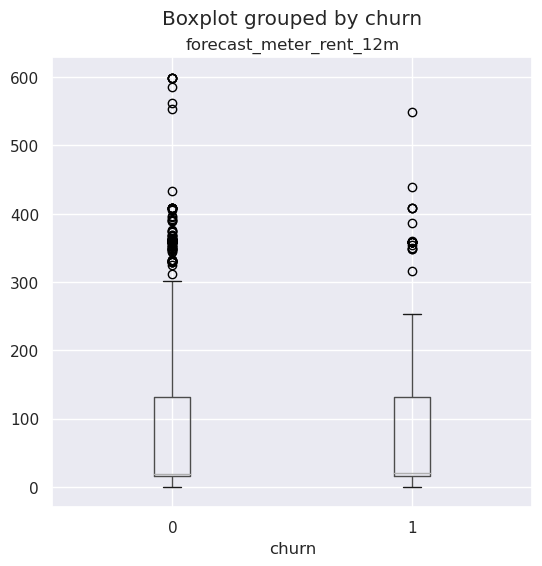

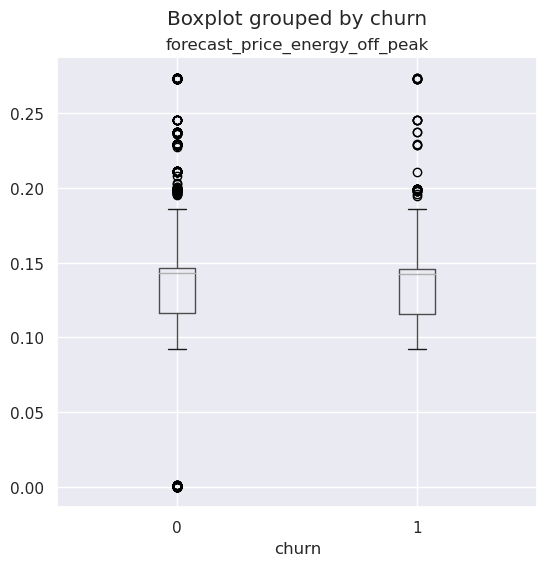

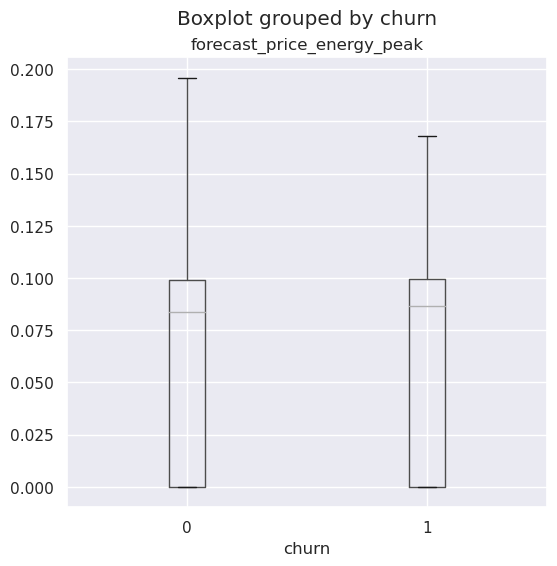

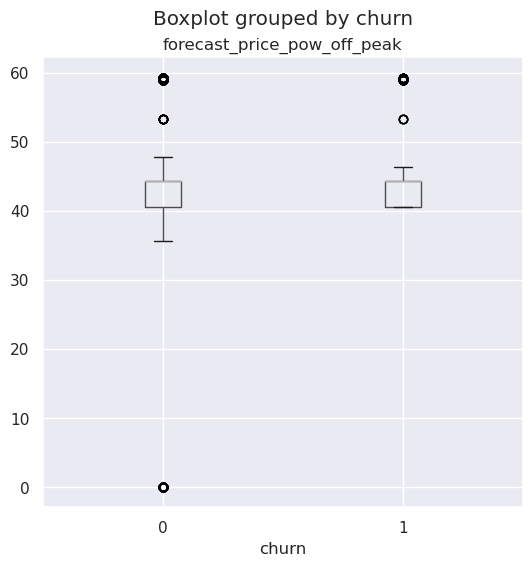

In [30]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

Similar to consumption, forecast variables also show postive skewed.

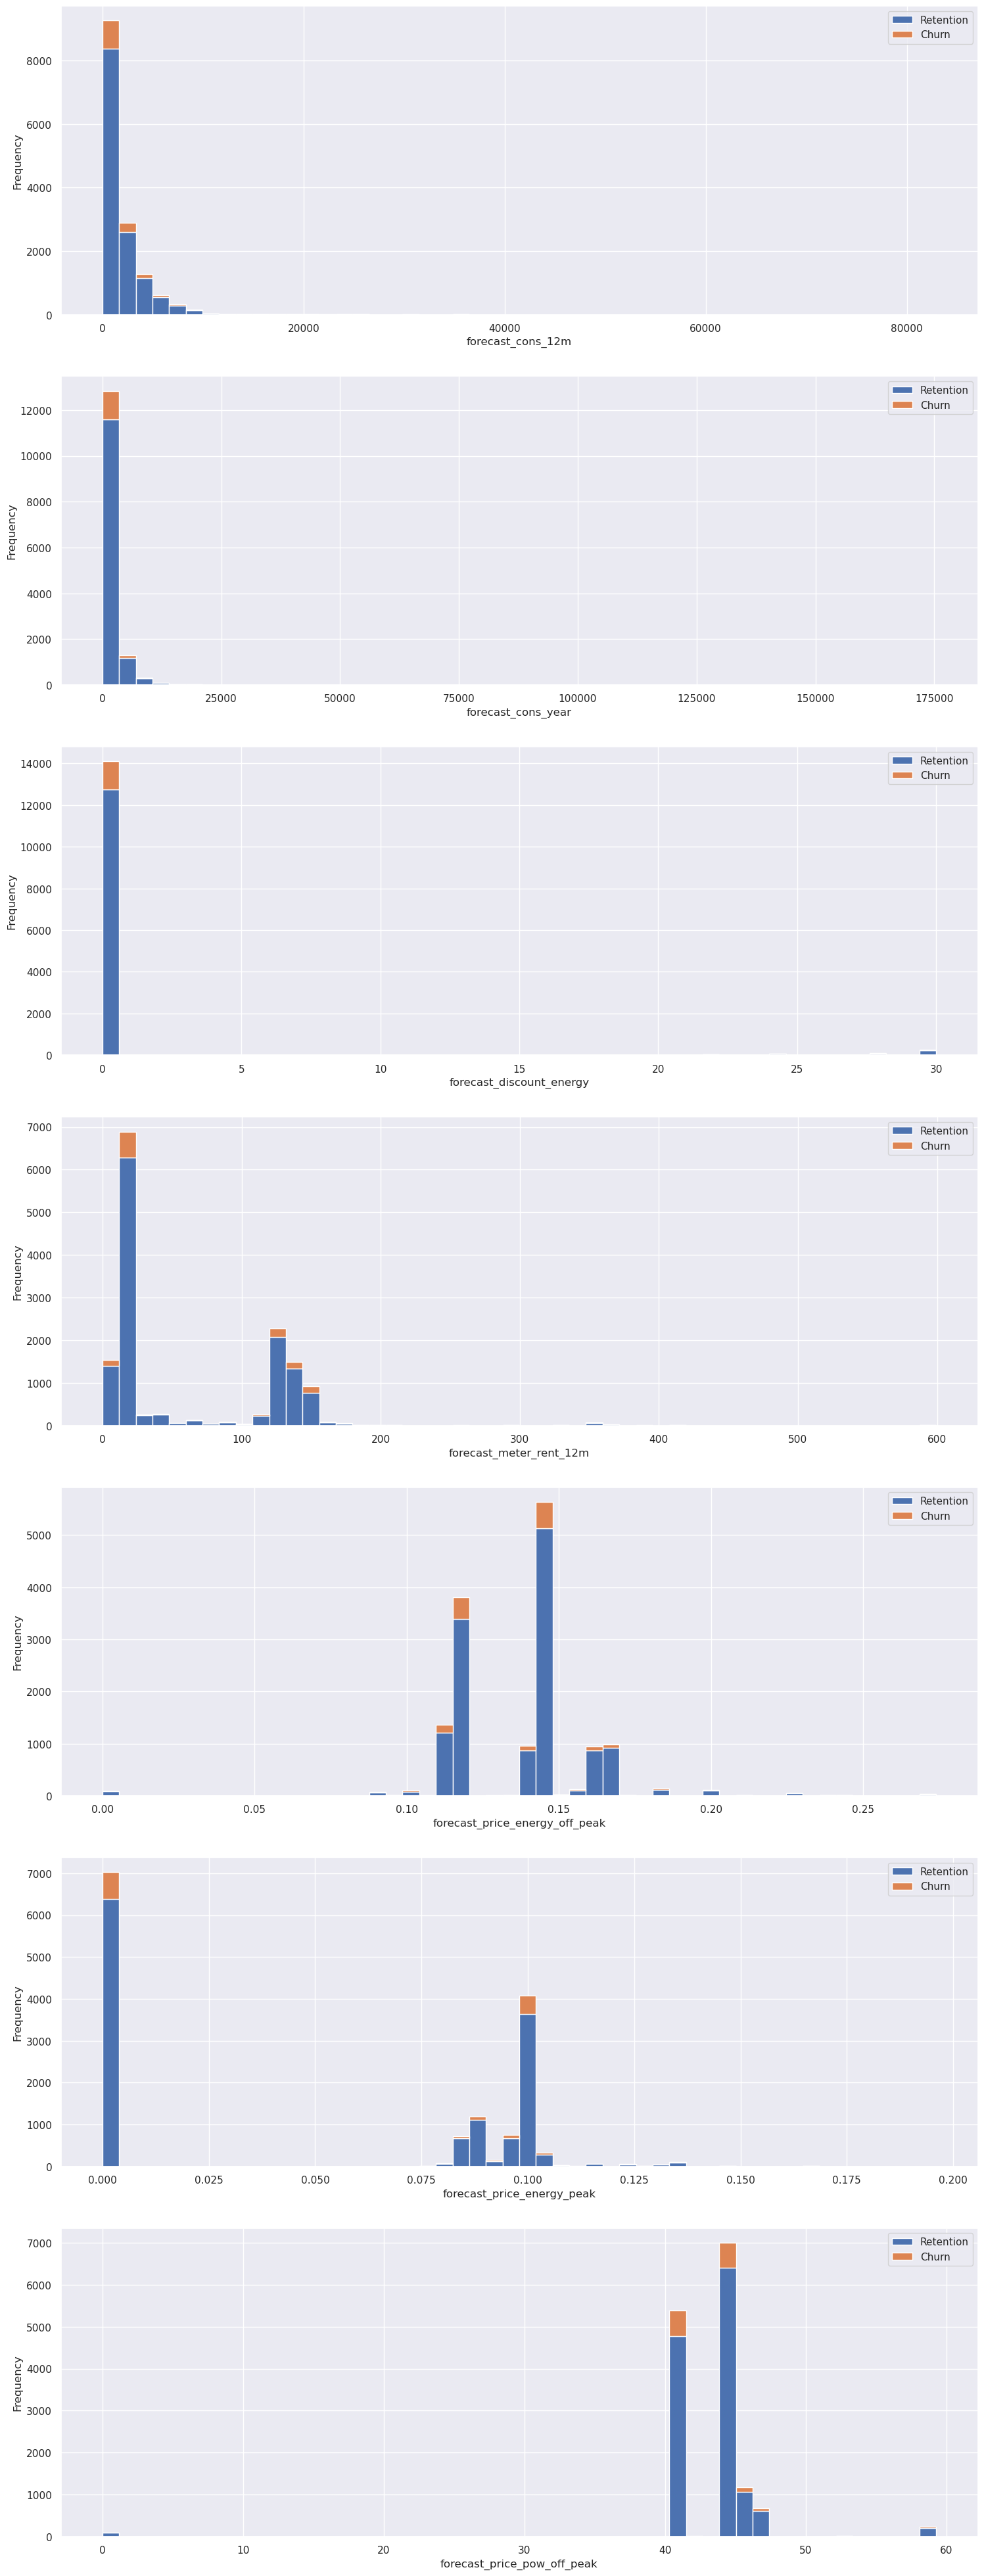

In [31]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

**Contract type**

In [32]:
contract_type = client_df[["id","has_gas","churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

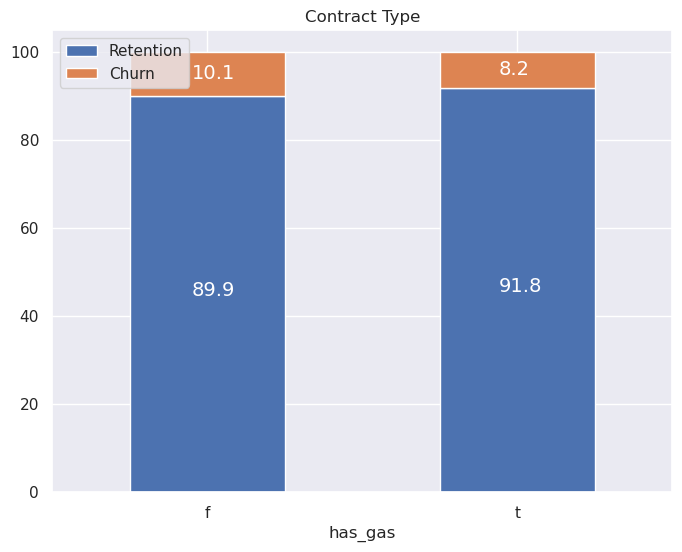

In [33]:
ax=contract_percentage.plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention','Churn'],loc="upper left")
plt.title("Contract Type")
plt.show()

The churn rate for customer without contract is a little bit higher than customers with contract.

**Margins**

In [34]:
margin = client_df[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]

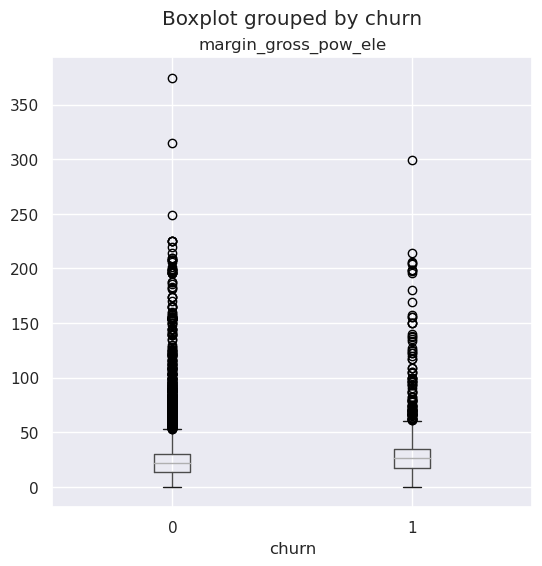

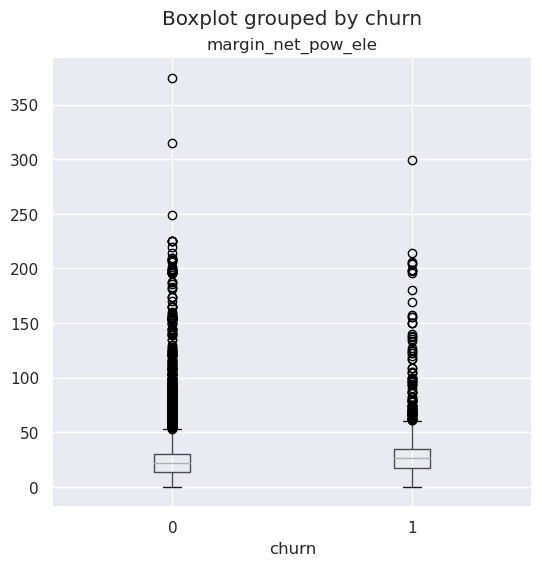

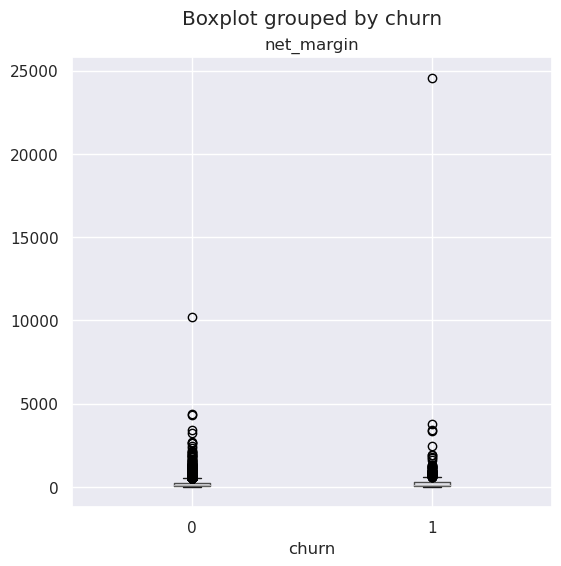

In [35]:
for col in margin:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

**Subscribed power**

In [36]:
power = client_df[["id", "pow_max", "churn"]]

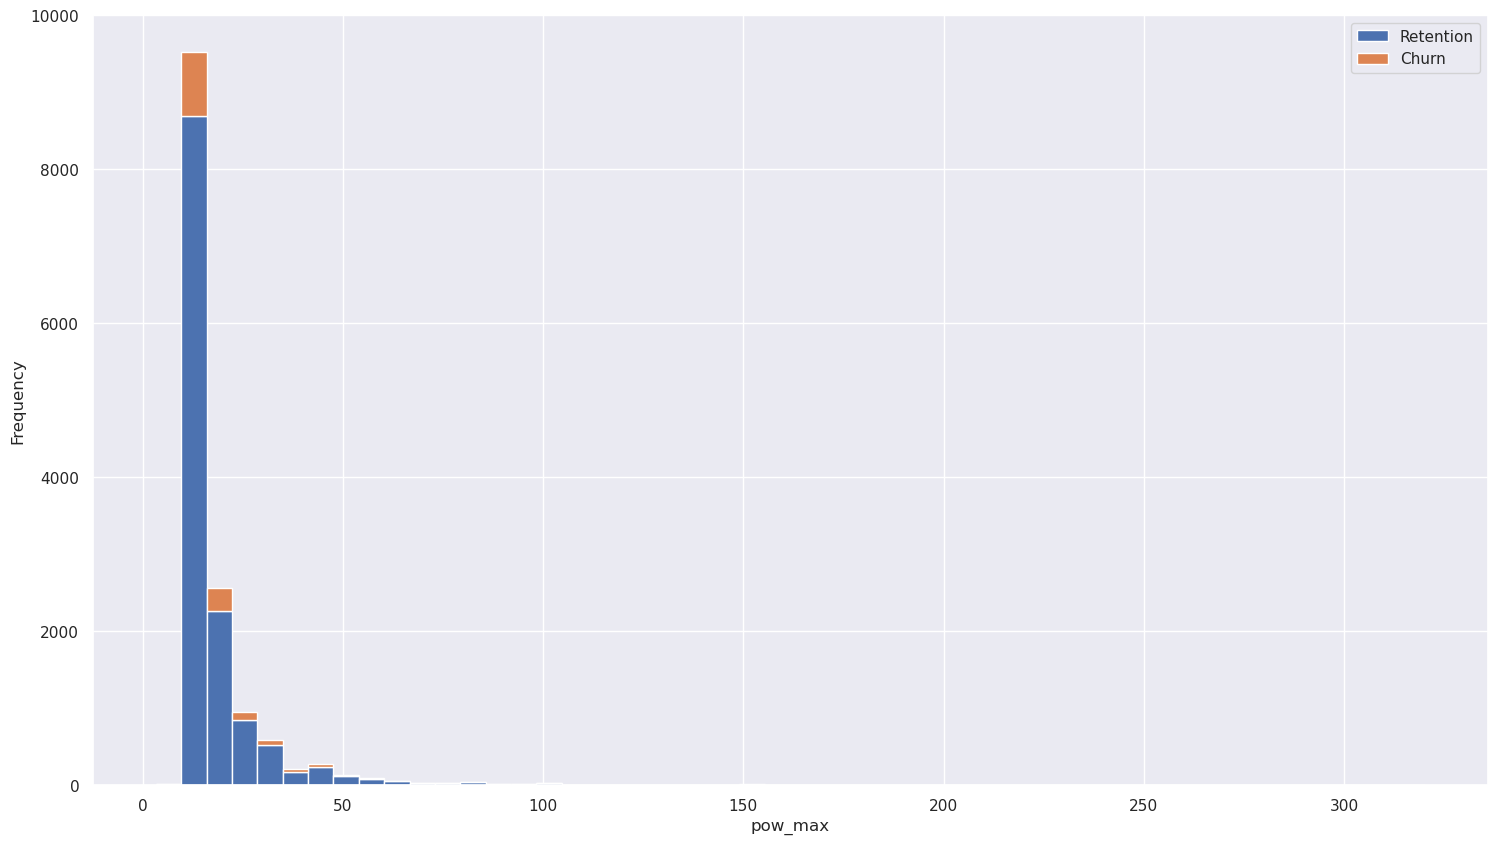

In [37]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

**Other Columns**

In [38]:
other_cols = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = other_cols.groupby([other_cols["nb_prod_act"], other_cols["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

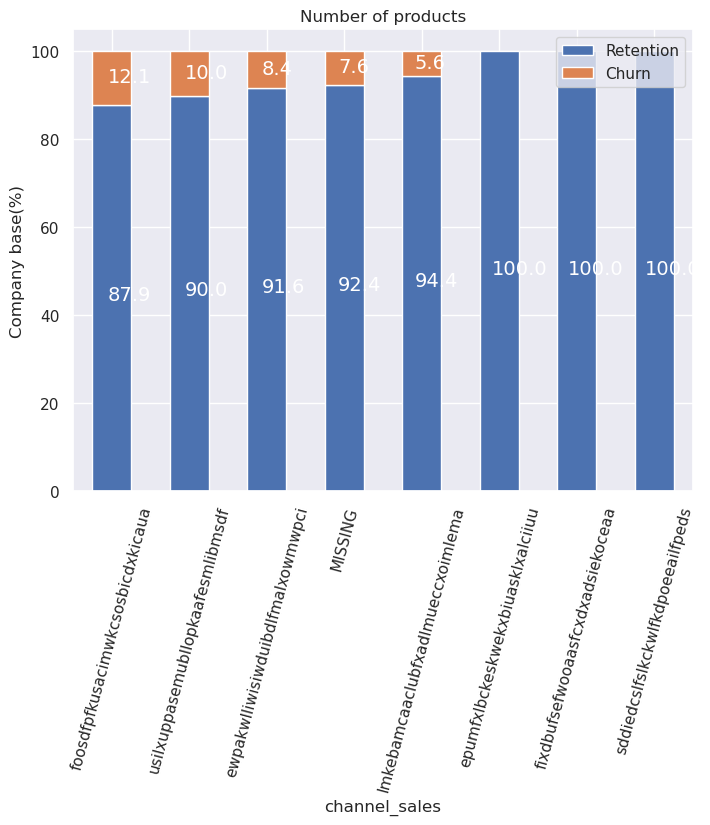

In [39]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number of products')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')
plt.show()

In [40]:
years_antig = other_cols.groupby([other_cols["num_years_antig"], other_cols["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

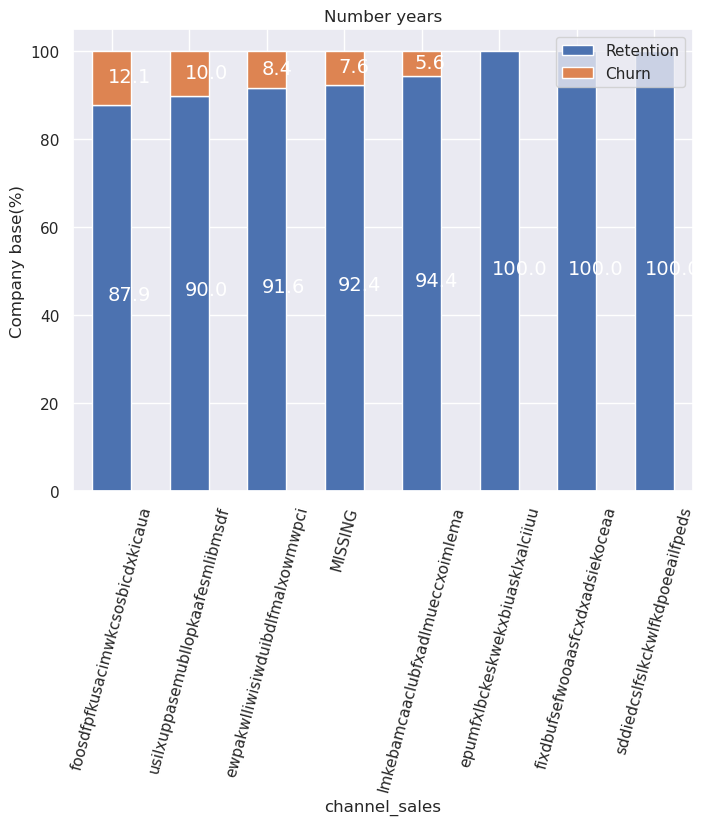

In [41]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Number years')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')
plt.show()

In [42]:
origin = other_cols.groupby([other_cols["origin_up"], other_cols["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)

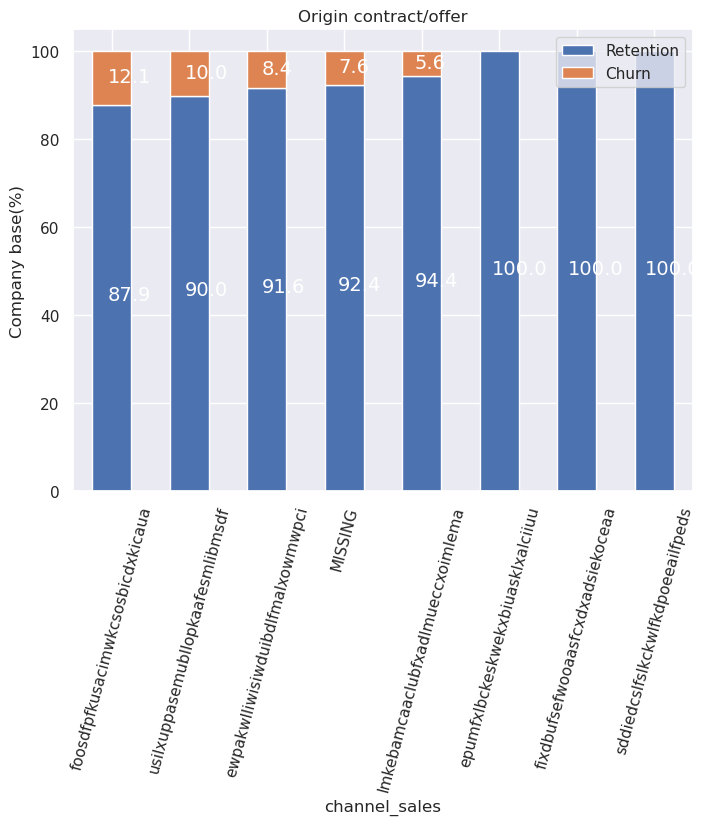

In [43]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(8,6),rot=75)
annotate_stacked_bars(ax, textsize=14)
plt.title('Origin contract/offer')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%)')
plt.show()

**Let's check Price Dataset**

In [44]:
price_df['id'].value_counts().value_counts()

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

Most customers have a 12-month price records each. Luckily, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

In [45]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [46]:
# plot histogram
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

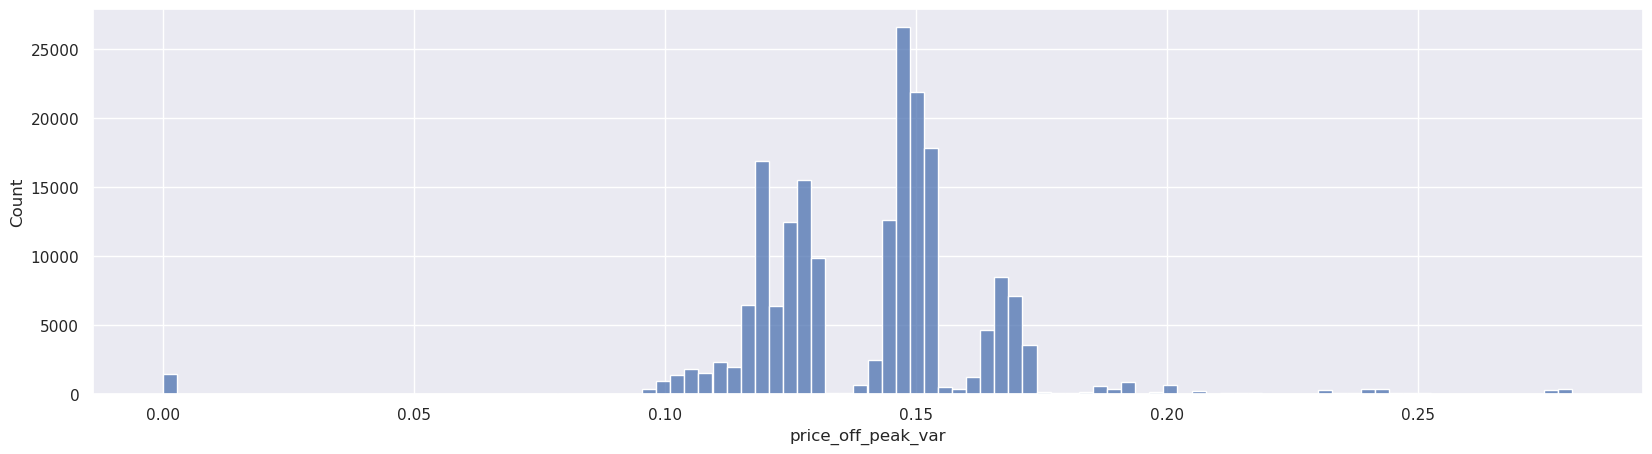

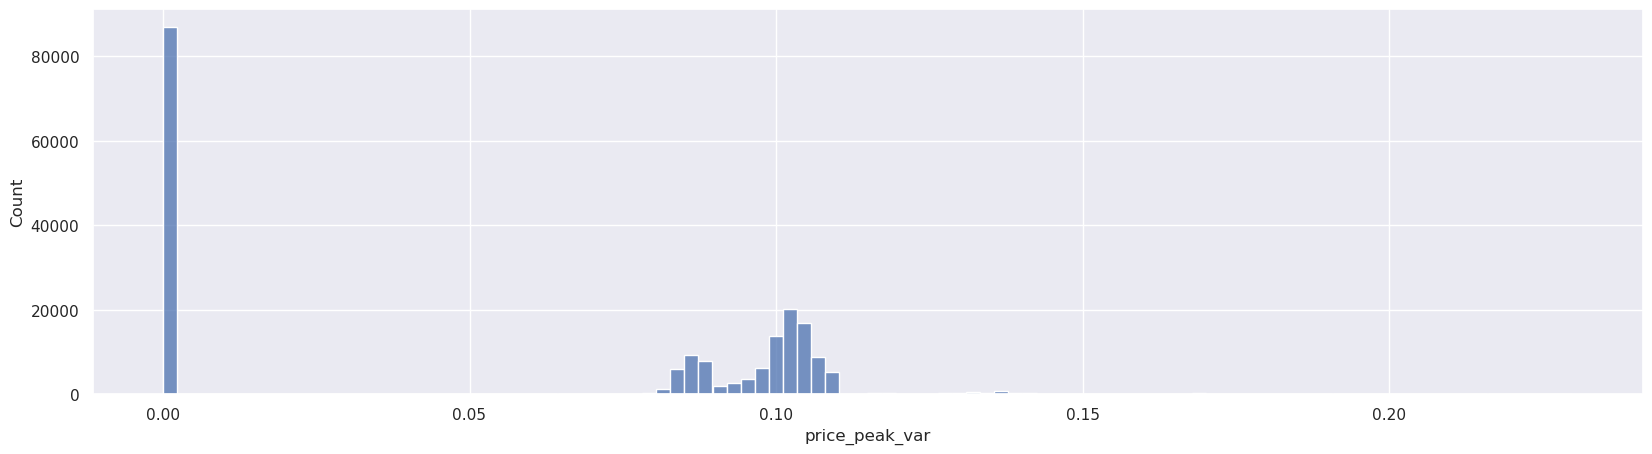

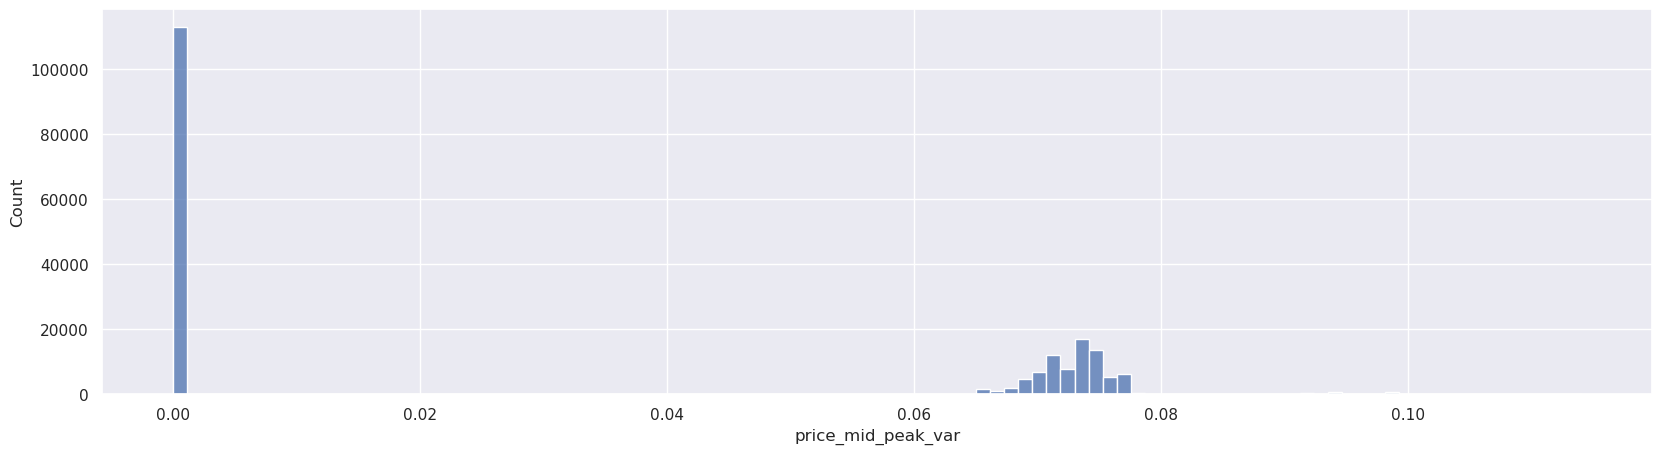

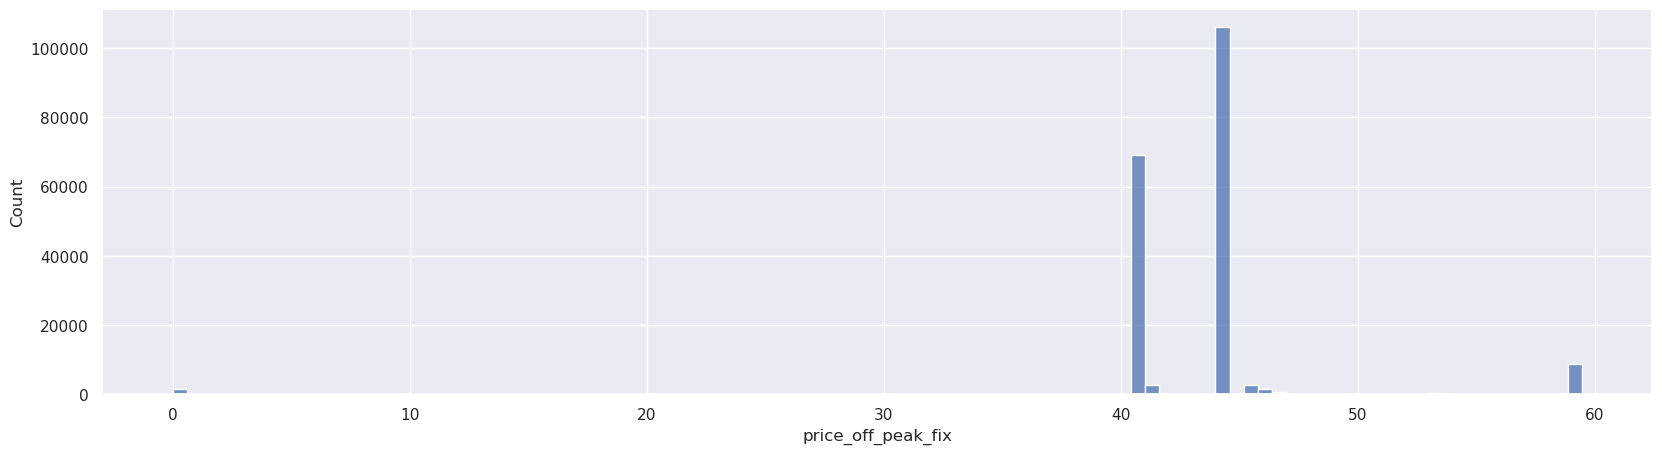

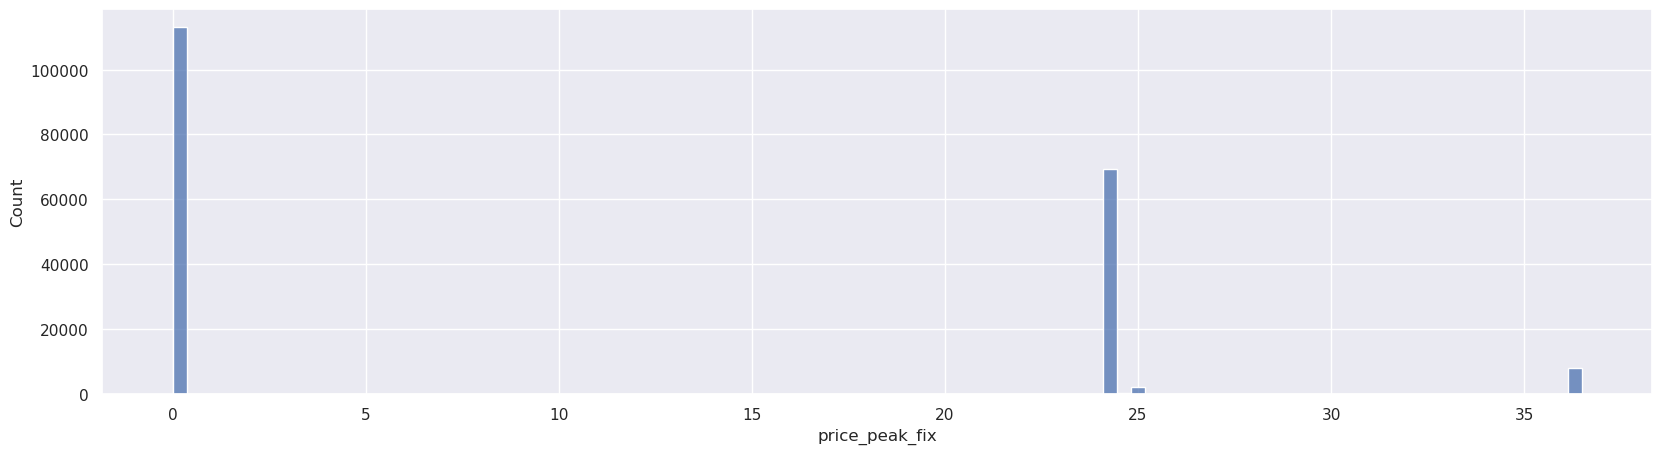

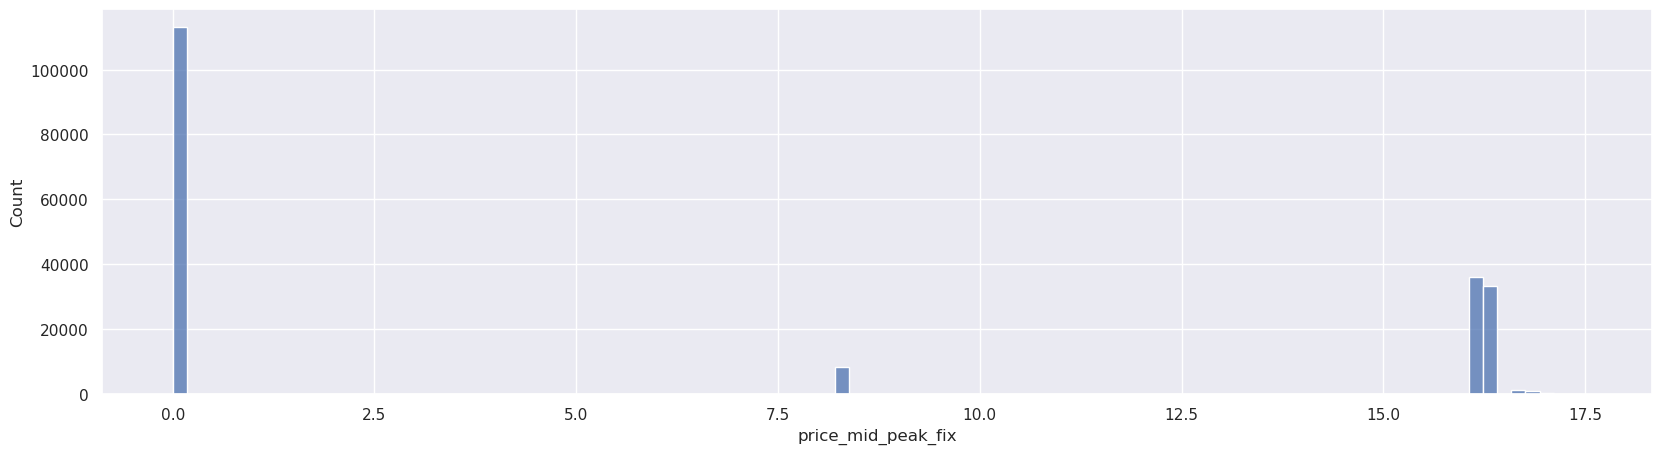

In [47]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

Plot histograms of price features. The values of each feature are centred around some points.

There are lots of 0 peak prices and mid-peak prices, but very few 0 off peak prices. So, I will analyse price sensivity only based on off-peak prices

### Hypothesis Investigation

Now, let's check customers sensitivity to price. When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months

In [48]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [49]:
mean_year.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [50]:
#rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [51]:
mean_year.head()

id  mean_year_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d                      0.124338   
1  0004351ebdd665e6ee664792efc4fd13                      0.146426   
2  0010bcc39e42b3c2131ed2ce55246e3c                      0.181558   
3  0010ee3855fdea87602a5b7aba8e42de                      0.118757   
4  00114d74e963e47177db89bc70108537                      0.147926   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.103794                      0.073160   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.098292                      0.069032   
4                  0.000000                      0.000000   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.701732                 24.421038   
1                     44.385450                  0.000000   
2                     45.319710                  0.000000   
3                     40.647427                 24.388455   
4                     44.266930                  0.000000   

   mean_year_price_mid_peak_fix  
0                     16.280694  
1                      0.000000  
2                      0.000000  
3                     16.258971  
4                      0.000000

In [52]:
#rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

In [53]:
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [54]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_6m_price_off_peak_var",
        "price_peak_var": "mean_6m_price_peak_var",
        "price_mid_peak_var": "mean_6m_price_mid_peak_var",
        "price_off_peak_fix": "mean_6m_price_off_peak_fix",
        "price_peak_fix": "mean_6m_price_peak_fix",
        "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"
    }
)

mean_6m["mean_6m_price_off_peak"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_peak"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_med_peak"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]

In [55]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_3m_price_off_peak_var",
        "price_peak_var": "mean_3m_price_peak_var",
        "price_mid_peak_var": "mean_3m_price_mid_peak_var",
        "price_off_peak_fix": "mean_3m_price_off_peak_fix",
        "price_peak_fix": "mean_3m_price_peak_fix",
        "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"
    }
)

mean_3m["mean_3m_price_off_peak"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_peak"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_med_peak"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [56]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [57]:
price_features.head()

id  mean_year_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d                      0.124338   
1  0004351ebdd665e6ee664792efc4fd13                      0.146426   
2  0010bcc39e42b3c2131ed2ce55246e3c                      0.181558   
3  0010ee3855fdea87602a5b7aba8e42de                      0.118757   
4  00114d74e963e47177db89bc70108537                      0.147926   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.103794                      0.073160   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.098292                      0.069032   
4                  0.000000                      0.000000   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.701732                 24.421038   
1                     44.385450                  0.000000   
2                     45.319710                  0.000000   
3                     40.647427                 24.388455   
4                     44.266930                  0.000000   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     16.280694                 40.826071   
1                      0.000000                 44.531877   
2                      0.000000                 45.501268   
3                     16.258971                 40.766185   
4                      0.000000                 44.414856   

   mean_year_price_peak  mean_year_price_med_peak  ...  \
0             24.524832                 16.353854  ...   
1              0.000000                  0.000000  ...   
2              0.000000                  0.000000  ...   
3             24.486748                 16.328003  ...   
4              0.000000                  0.000000  ...   

   mean_6m_price_med_peak  mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0               16.365283                    0.119906                0.101673   
1                0.000000                    0.143943                0.000000   
2                0.000000                    0.201280                0.000000   
3               16.360973                    0.113068                0.095385   
4                0.000000                    0.145440                0.000000   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.073719                   40.728885   
1                    0.000000                   44.444710   
2                    0.000000                   45.944710   
3                    0.069409                   40.728885   
4                    0.000000                   44.266930   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0                24.43733                   16.291555               40.848791   
1                 0.00000                    0.000000               44.588653   
2                 0.00000                    0.000000               46.145990   
3                24.43733                   16.291555               40.841953   
4                 0.00000                    0.000000               44.412370   

   mean_3m_price_peak  mean_3m_price_med_peak  
0           24.539003               16.365274  
1            0.000000                0.000000  
2            0.000000                0.000000  
3           24.532715               16.360964  
4            0.000000                0.000000  

[5 rows x 28 columns]

Let's merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [58]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

id  mean_year_price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d                      0.124338   
1  0004351ebdd665e6ee664792efc4fd13                      0.146426   
2  0010bcc39e42b3c2131ed2ce55246e3c                      0.181558   
3  00114d74e963e47177db89bc70108537                      0.147926   
4  0013f326a839a2f6ad87a1859952d227                      0.126076   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.103794                      0.073160   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                  0.105542                      0.074921   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.701732                 24.421038   
1                     44.385450                  0.000000   
2                     45.319710                  0.000000   
3                     44.266930                  0.000000   
4                     40.728885                 24.437330   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     16.280694                 40.826071   
1                      0.000000                 44.531877   
2                      0.000000                 45.501268   
3                      0.000000                 44.414856   
4                     16.291555                 40.854961   

   mean_year_price_peak  mean_year_price_med_peak  ...  \
0             24.524832                 16.353854  ...   
1              0.000000                  0.000000  ...   
2              0.000000                  0.000000  ...   
3              0.000000                  0.000000  ...   
4             24.542872                 16.366476  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.119906                0.101673   
1                    0.143943                0.000000   
2                    0.201280                0.000000   
3                    0.145440                0.000000   
4                    0.121647                0.103413   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.073719                   40.728885   
1                    0.000000                   44.444710   
2                    0.000000                   45.944710   
3                    0.000000                   44.266930   
4                    0.075460                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0                24.43733                   16.291555               40.848791   
1                 0.00000                    0.000000               44.588653   
2                 0.00000                    0.000000               46.145990   
3                 0.00000                    0.000000               44.412370   
4                24.43733                   16.291555               40.850532   

   mean_3m_price_peak  mean_3m_price_med_peak  churn  
0           24.539003               16.365274      0  
1            0.000000                0.000000      0  
2            0.000000                0.000000      0  
3            0.000000                0.000000      0  
4           24.540743               16.367015      0  

[5 rows x 29 columns]

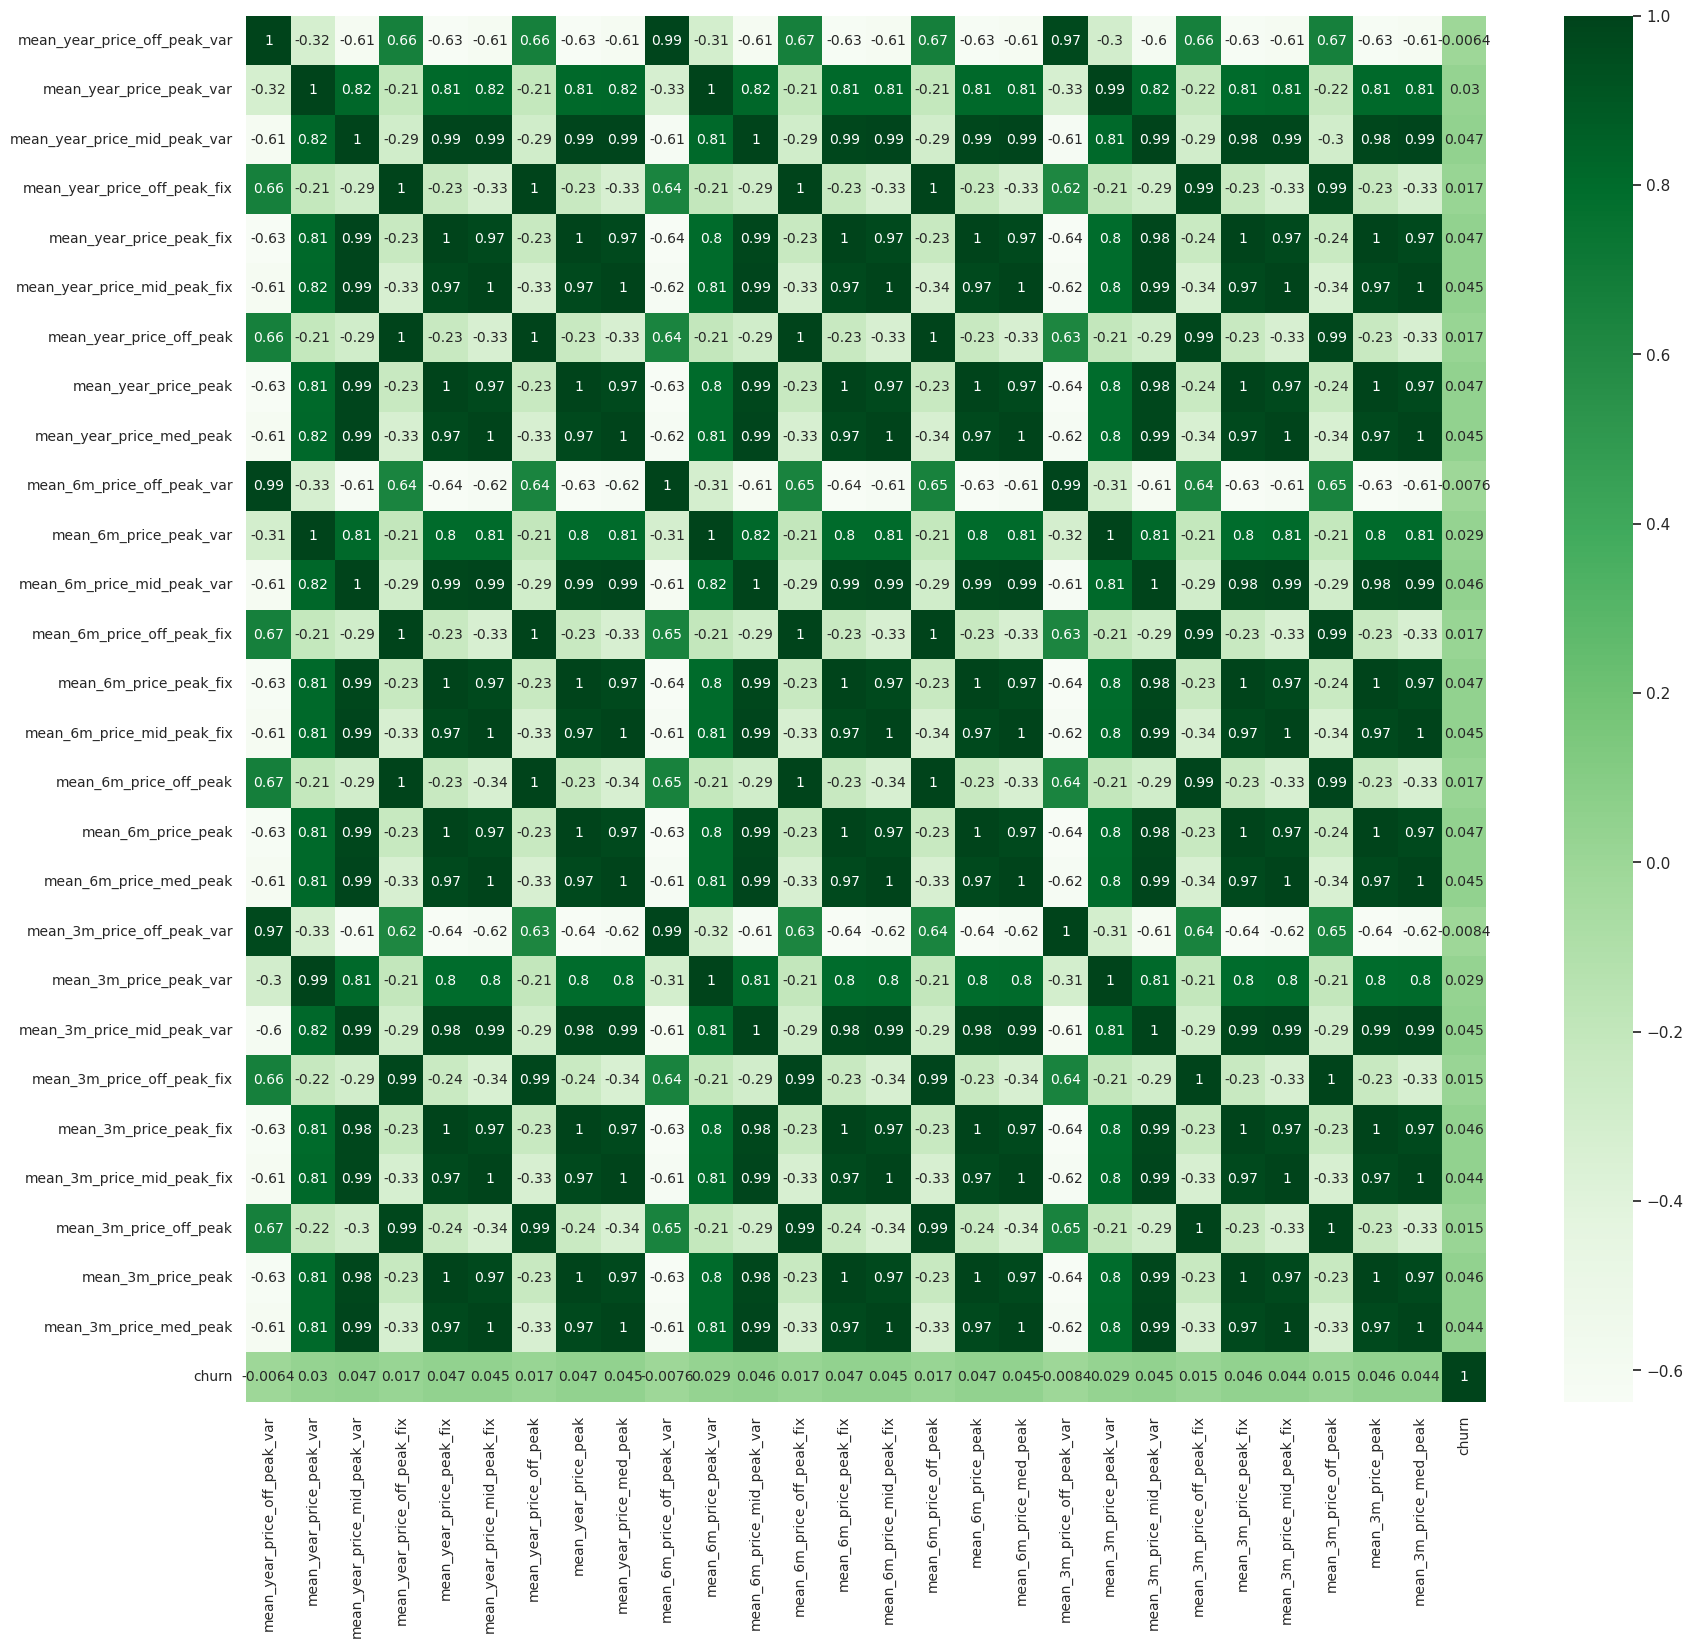

In [59]:
corr = price_churn.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The above plot shows the correlation betweeen price variables with each other and with churn, however, the correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.

Now, we will merge the client data with price churn data for modeling in the next move.

In [60]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')
churn_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix mean_3m_price_off_peak  \
0               12.218665                    8.145777              42.629663   
1                0.000000                    0.000000              44.592310   
2                0.000000                    0.000000              44.612508   
3                0.000000                    0.000000              44.593296   
4               24.437330                   16.291555              40.848791   

   mean_3m_price_peak  mean_3m_price_med_peak  churn  
0           12.311304                8.182687      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  
3            0.000000                0.000000      0  
4           24.539003               16.365274      0  

[5 rows x 53 columns]

In [61]:
churn_data.to_csv('clean_data_modeling.csv')

## Feature Engineering

In [62]:
date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
df = pd.read_csv('/kaggle/input/bcg-gamma-data-science-internship/clean_data_modeling.csv',parse_dates=date_cols)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

  mean_3m_price_peak  mean_3m_price_med_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  
3           0.000000                0.000000      0  
4          24.539003               16.365274      0  

[5 rows x 54 columns]

This data consists of PowerCo's churn information which mean customer will switch to another provider or not. Scroll to the right if necessary, and note that the final column in the dataset (Churn) contains the value 0 for customer who doesn't churn, and 1 for patients who churns. This is the label that we will train our model to predict; other columns are the features we will use to predict the Churn label.

As usual, I'll train a `binary classifier` to predict whether or not a customer should be churn based on some historical data. But according to task requirements, a `Random Forest classifier` will used to predict customer churn and evaluate the performance of the model with suitable evaluation metrics.

For tree-based models, there is no need to perform data scaling, unlike other machine learning models. And dont need to apply one-hot encoding to processing categorical variables, just use label-encoding to convert categorical variables to numeric variables.

In [63]:
df.drop(columns = 'Unnamed: 0', inplace=True) #drop the Unnamed column

In [64]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix mean_3m_price_off_peak  \
0               12.218665                    8.145777              42.629663   
1                0.000000                    0.000000              44.592310   
2                0.000000                    0.000000              44.612508   
3                0.000000                    0.000000              44.593296   
4               24.437330                   16.291555              40.848791   

   mean_3m_price_peak  mean_3m_price_med_peak  churn  
0           12.311304                8.182687      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  
3            0.000000                0.000000      0  
4           24.539003               16.365274      0  

[5 rows x 53 columns]

In [65]:
df.shape

(14605, 53)

In [66]:
df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [67]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [68]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
print(monthly_price_by_id.head())
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

                                 id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885  


In [69]:
jan_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3  0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4  00114d74e963e47177db89bc70108537 2015-01-01            0.149434   

   price_off_peak_fix  
0           40.565969  
1           44.266931  
2           44.444710  
3           40.565969  
4           44.266931

In [70]:
monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

In [71]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak mean_3m_price_med_peak  churn  \
0           12.311304               8.182687      1   
1            0.000000               0.000000      0   
2            0.088409               0.000000      0   
3            0.000000               0.000000      0   
4           24.539003              16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 55 columns]

In the dataset, we have some datetime features:

* `date_activ` = date of activation of the contract
* `date_end` = registered date of the end of the contract
* `date_modif_prod` = date of the last modification of the product
* `date_renewal` = date of the next contract renewal

From these features, we can create new columns called:

* `tenure`: the time customer uses service of PowerCo
* `months_activ` = Number of months active until reference date (Jan 2016)
* `months_to_end` = Number of months of the contract left until reference date (Jan 2016)
* `months_modif_prod` = Number of months since last modification until reference date (Jan 2016)
* `months_renewal` = Number of months since last renewal until reference date (Jan 2016)


In [72]:
# We no longer need the datetime columns so we can drop them
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  mean_3m_price_mid_peak_var  \
0                        0.114481  ...                    0.036909   
1                        0.145711  ...                    0.000000   
2                        0.165794  ...                    0.000000   
3                        0.146694  ...                    0.000000   
4                        0.116900  ...                    0.073719   

   mean_3m_price_off_peak_fix mean_3m_price_peak_fix  \
0                   42.497907              12.218665   
1                   44.444710               0.000000   
2                   44.444710               0.000000   
3                   44.444710               0.000000   
4                   40.728885              24.437330   

   mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  mean_3m_price_peak  \
0                    8.145777               42.629663           12.311304   
1                    0.000000               44.592310            0.000000   
2                    0.000000               44.612508            0.088409   
3                    0.000000               44.593296            0.000000   
4                   16.291555               40.848791           24.539003   

   mean_3m_price_med_peak  churn  offpeak_diff_dec_january_energy  \
0                8.182687      1                         0.020057   
1                0.000000      0                        -0.003767   
2                0.000000      0                        -0.004670   
3                0.000000      0                        -0.004547   
4               16.365274      0                        -0.006192   

  offpeak_diff_dec_january_power  
0                       3.700961  
1                       0.177779  
2                       0.177779  
3                       0.177779  
4                       0.162916  

[5 rows x 51 columns]

### Transform Categorical Data

We have 3 categorical variables including: `has_gas`, `channel_sales`, `origin_up`.

In [73]:
#For the column has_gas, replace t for 1 and f for 0
df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])

In [74]:
# Let's check values of the two others.

df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [75]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

There is imbalance in the number of values for channel_sales and origin_up so we will remove the values with very little occurences comparing with others.

In [76]:
#One hot encoding using get_dummies()
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'])

In [77]:
#remove values with very little occurences
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu','channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
                     'origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_energy  \
0                    0.098142  ...                         0.020057   
1                    0.000000  ...                        -0.003767   
2                    0.087899  ...                        -0.004670   
3                    0.000000  ...                        -0.004547   
4                    0.100015  ...                        -0.006192   

   offpeak_diff_dec_january_power  channel_sales_MISSING  \
0                        3.700961                      0   
1                        0.177779                      1   
2                        0.177779                      0   
3                        0.177779                      0   
4                        0.162916                      1   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1       

### Transform Numerical Data

From the previous EDA we can see that some features are highly skewed, we need to transform the distribution to normal-like distribution. We will use log transfomation via Numpy by calling the log() function on the desired column. First, we will check skewed features, so that we can compare before and after transformation

In [78]:
numeric_features = df[[
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]]
numeric_features.describe().T

count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

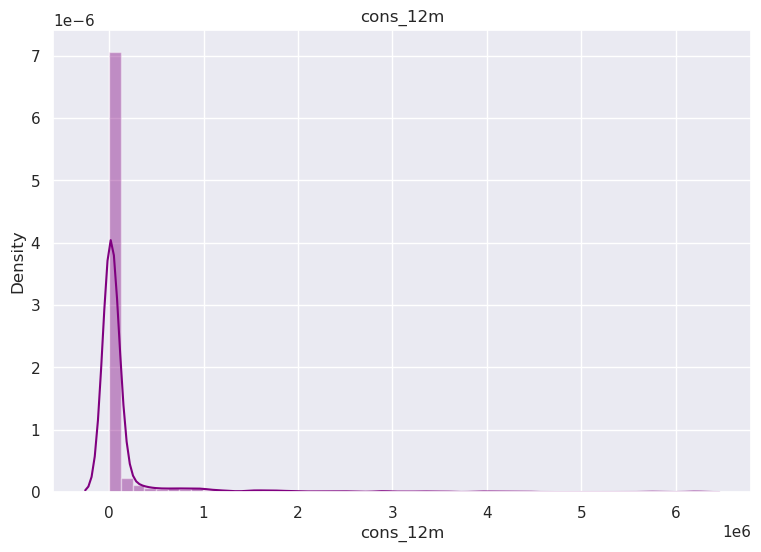

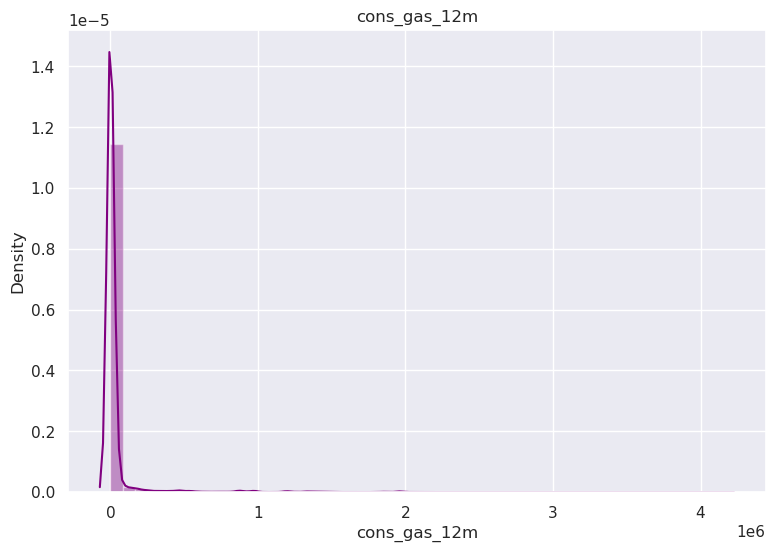

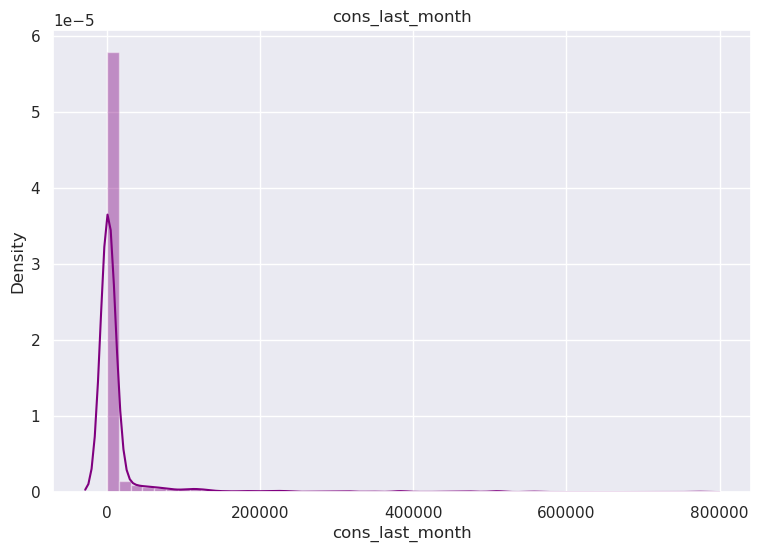

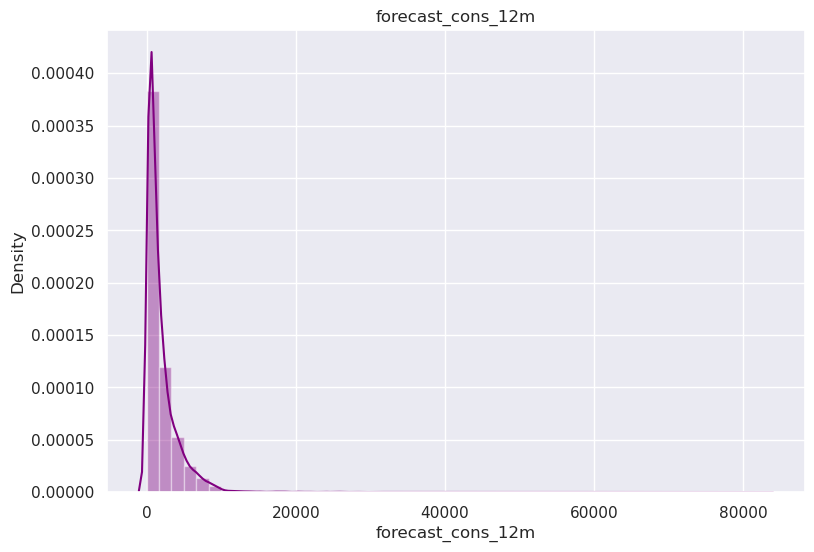

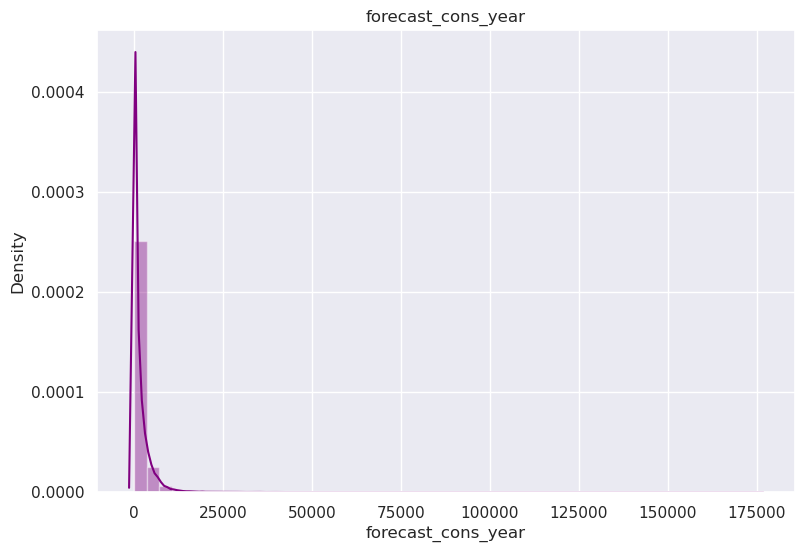

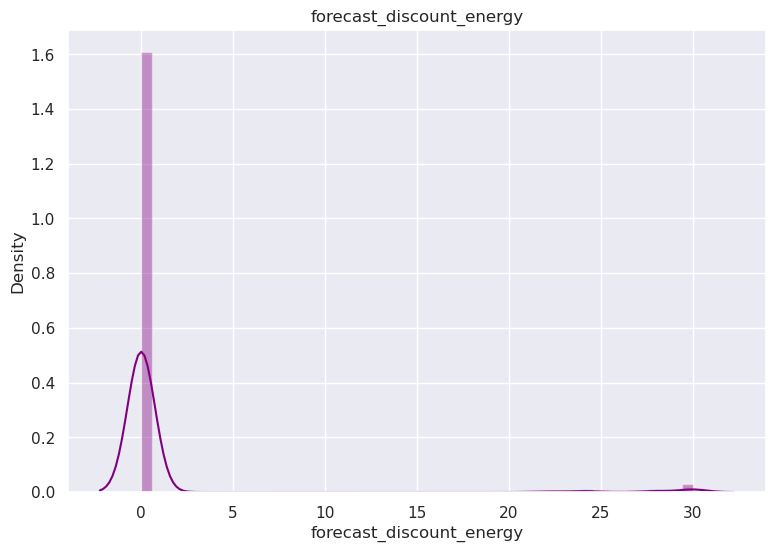

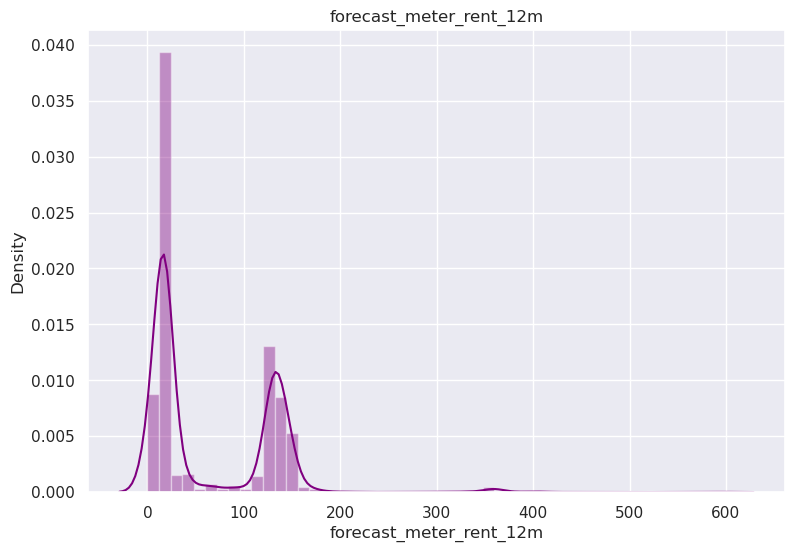

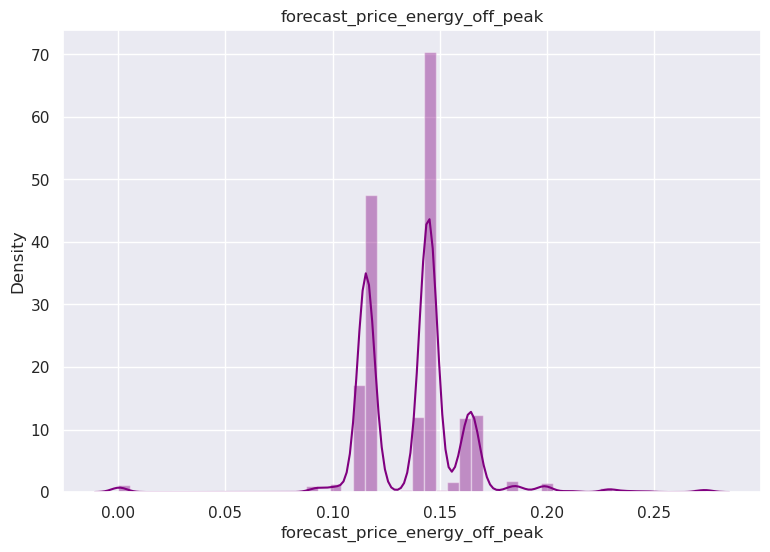

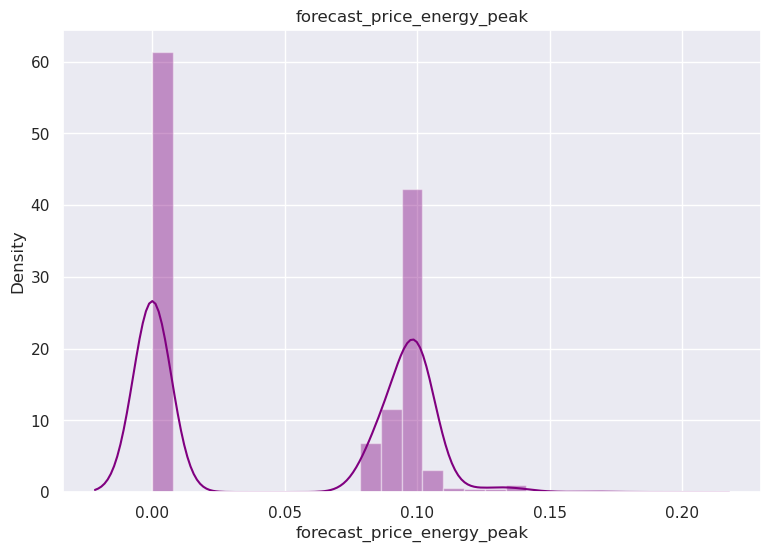

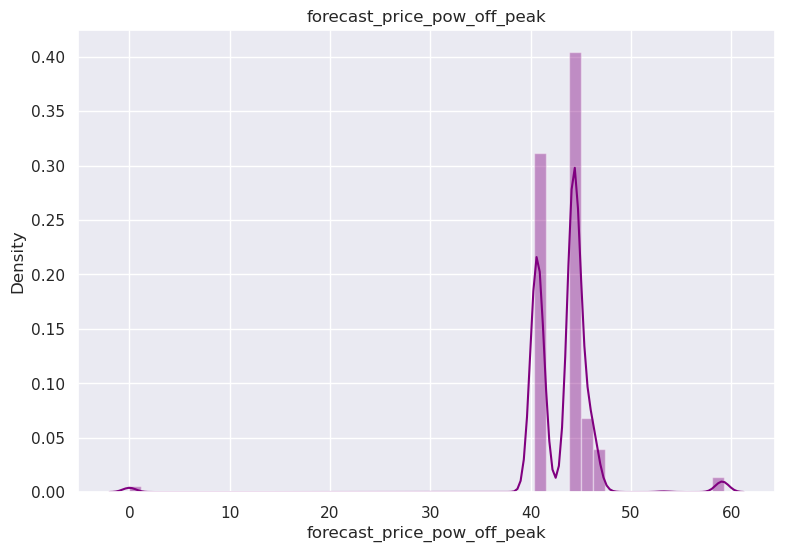

In [79]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax, color="purple")
    ax.set_title(col)
plt.show()

We can see that the standard deviation for most of these features is quite high. Note that we cannot apply log to a value of 0, so we will add a constant of 1 to all the values.

In [80]:
import numpy as np

In [81]:
for i in numeric_features:
    df[i]=df[i].apply(lambda x:np.log(1+x))

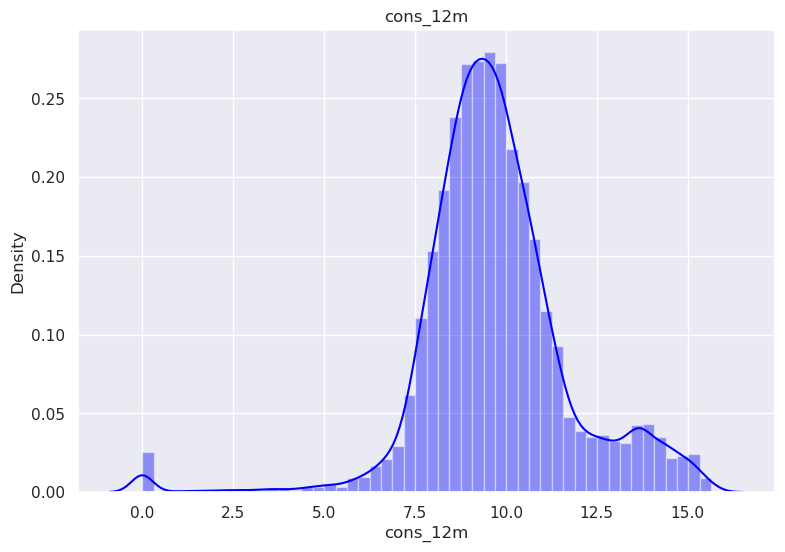

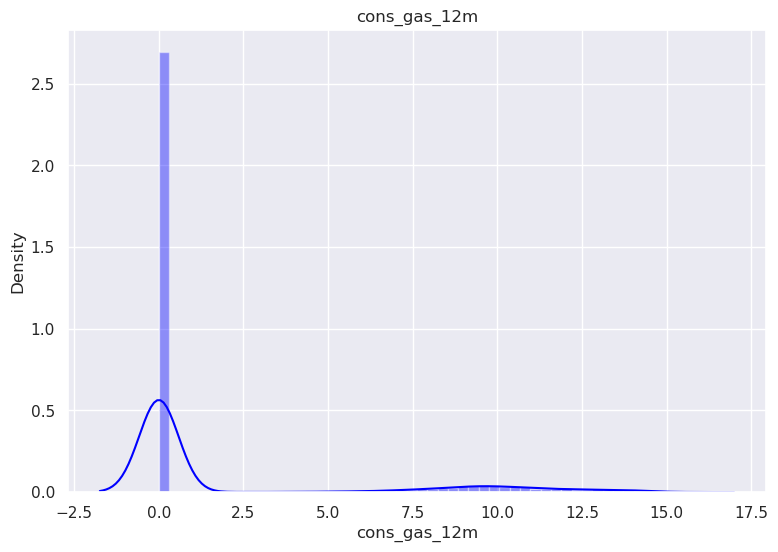

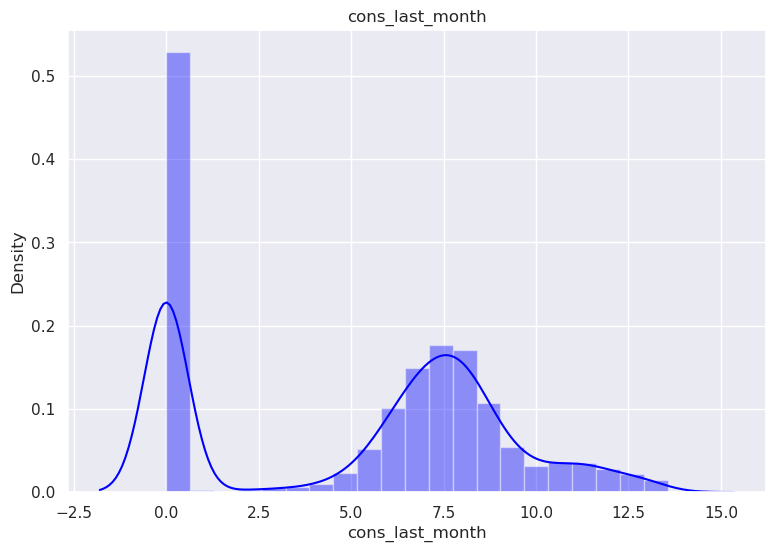

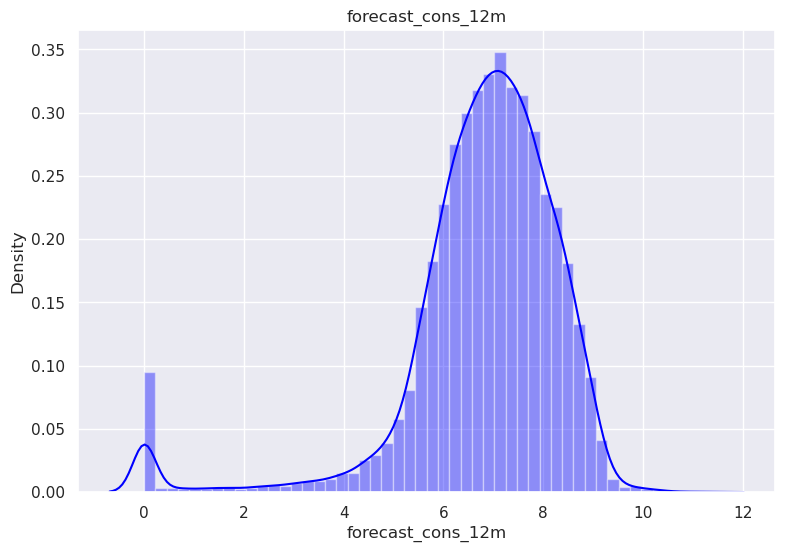

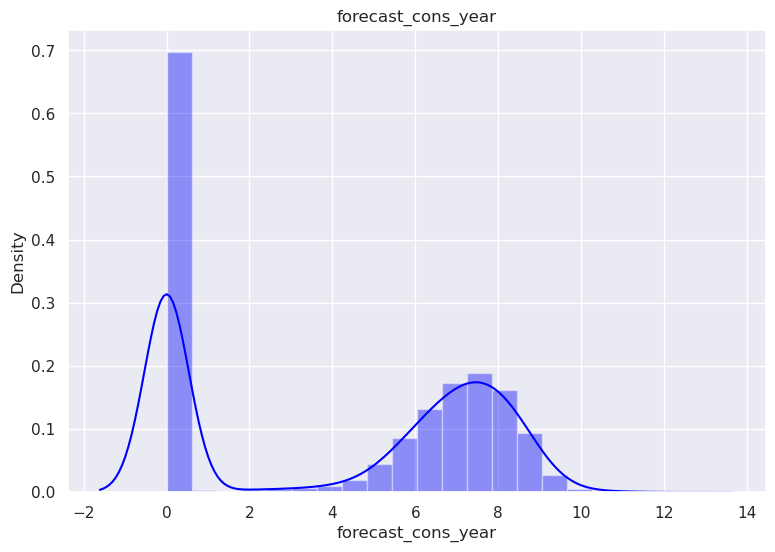

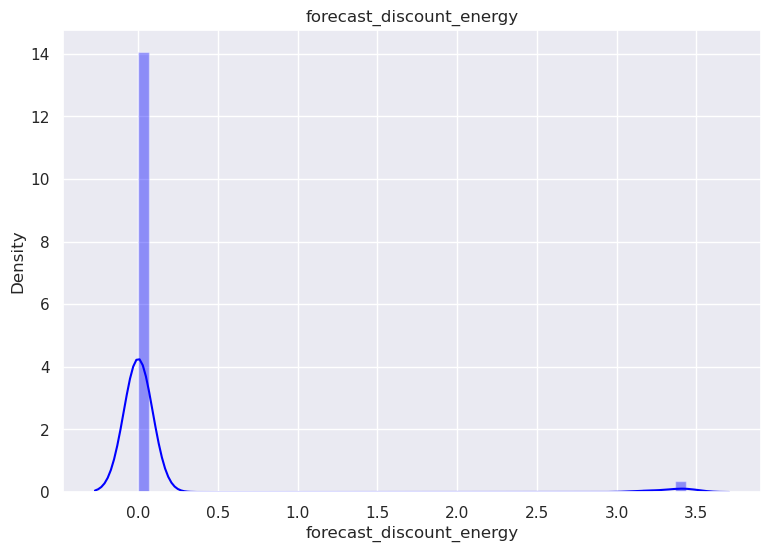

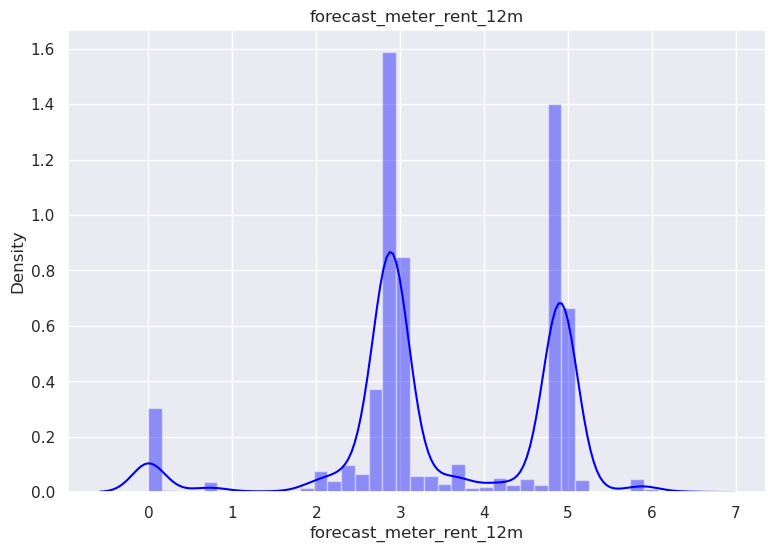

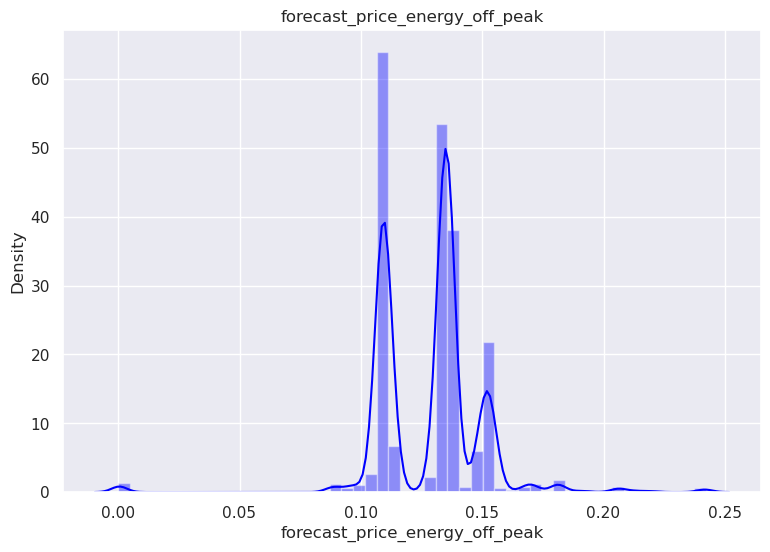

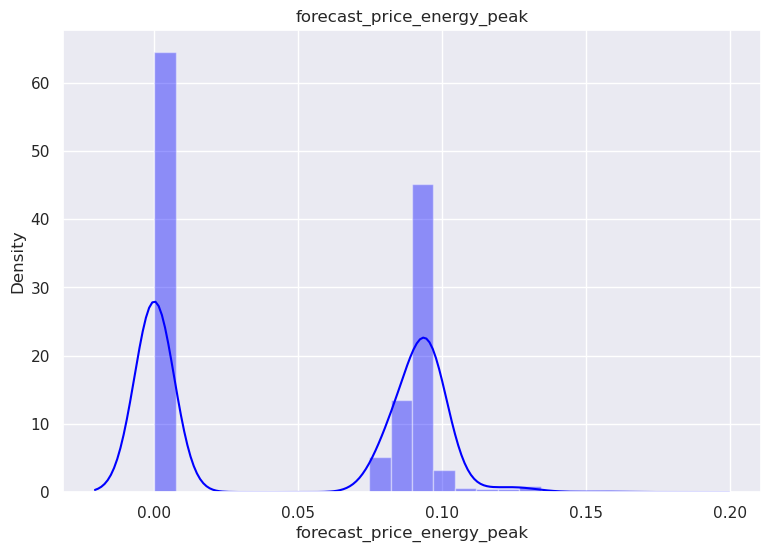

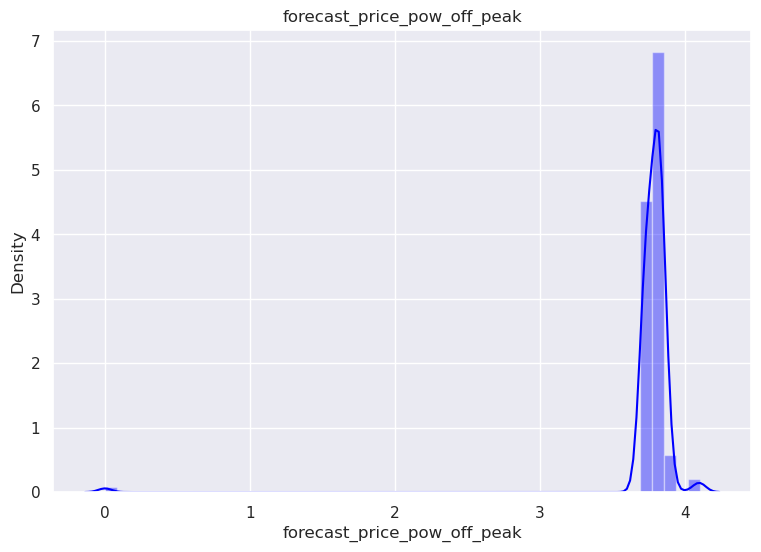

In [82]:
# Let's quickly check the distributions after log transformation.

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax, color="blue")
    ax.set_title(col)
plt.show()

#### **Correlations**

Correlation reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, we can remove them.

In [83]:
correlation = df.corr()

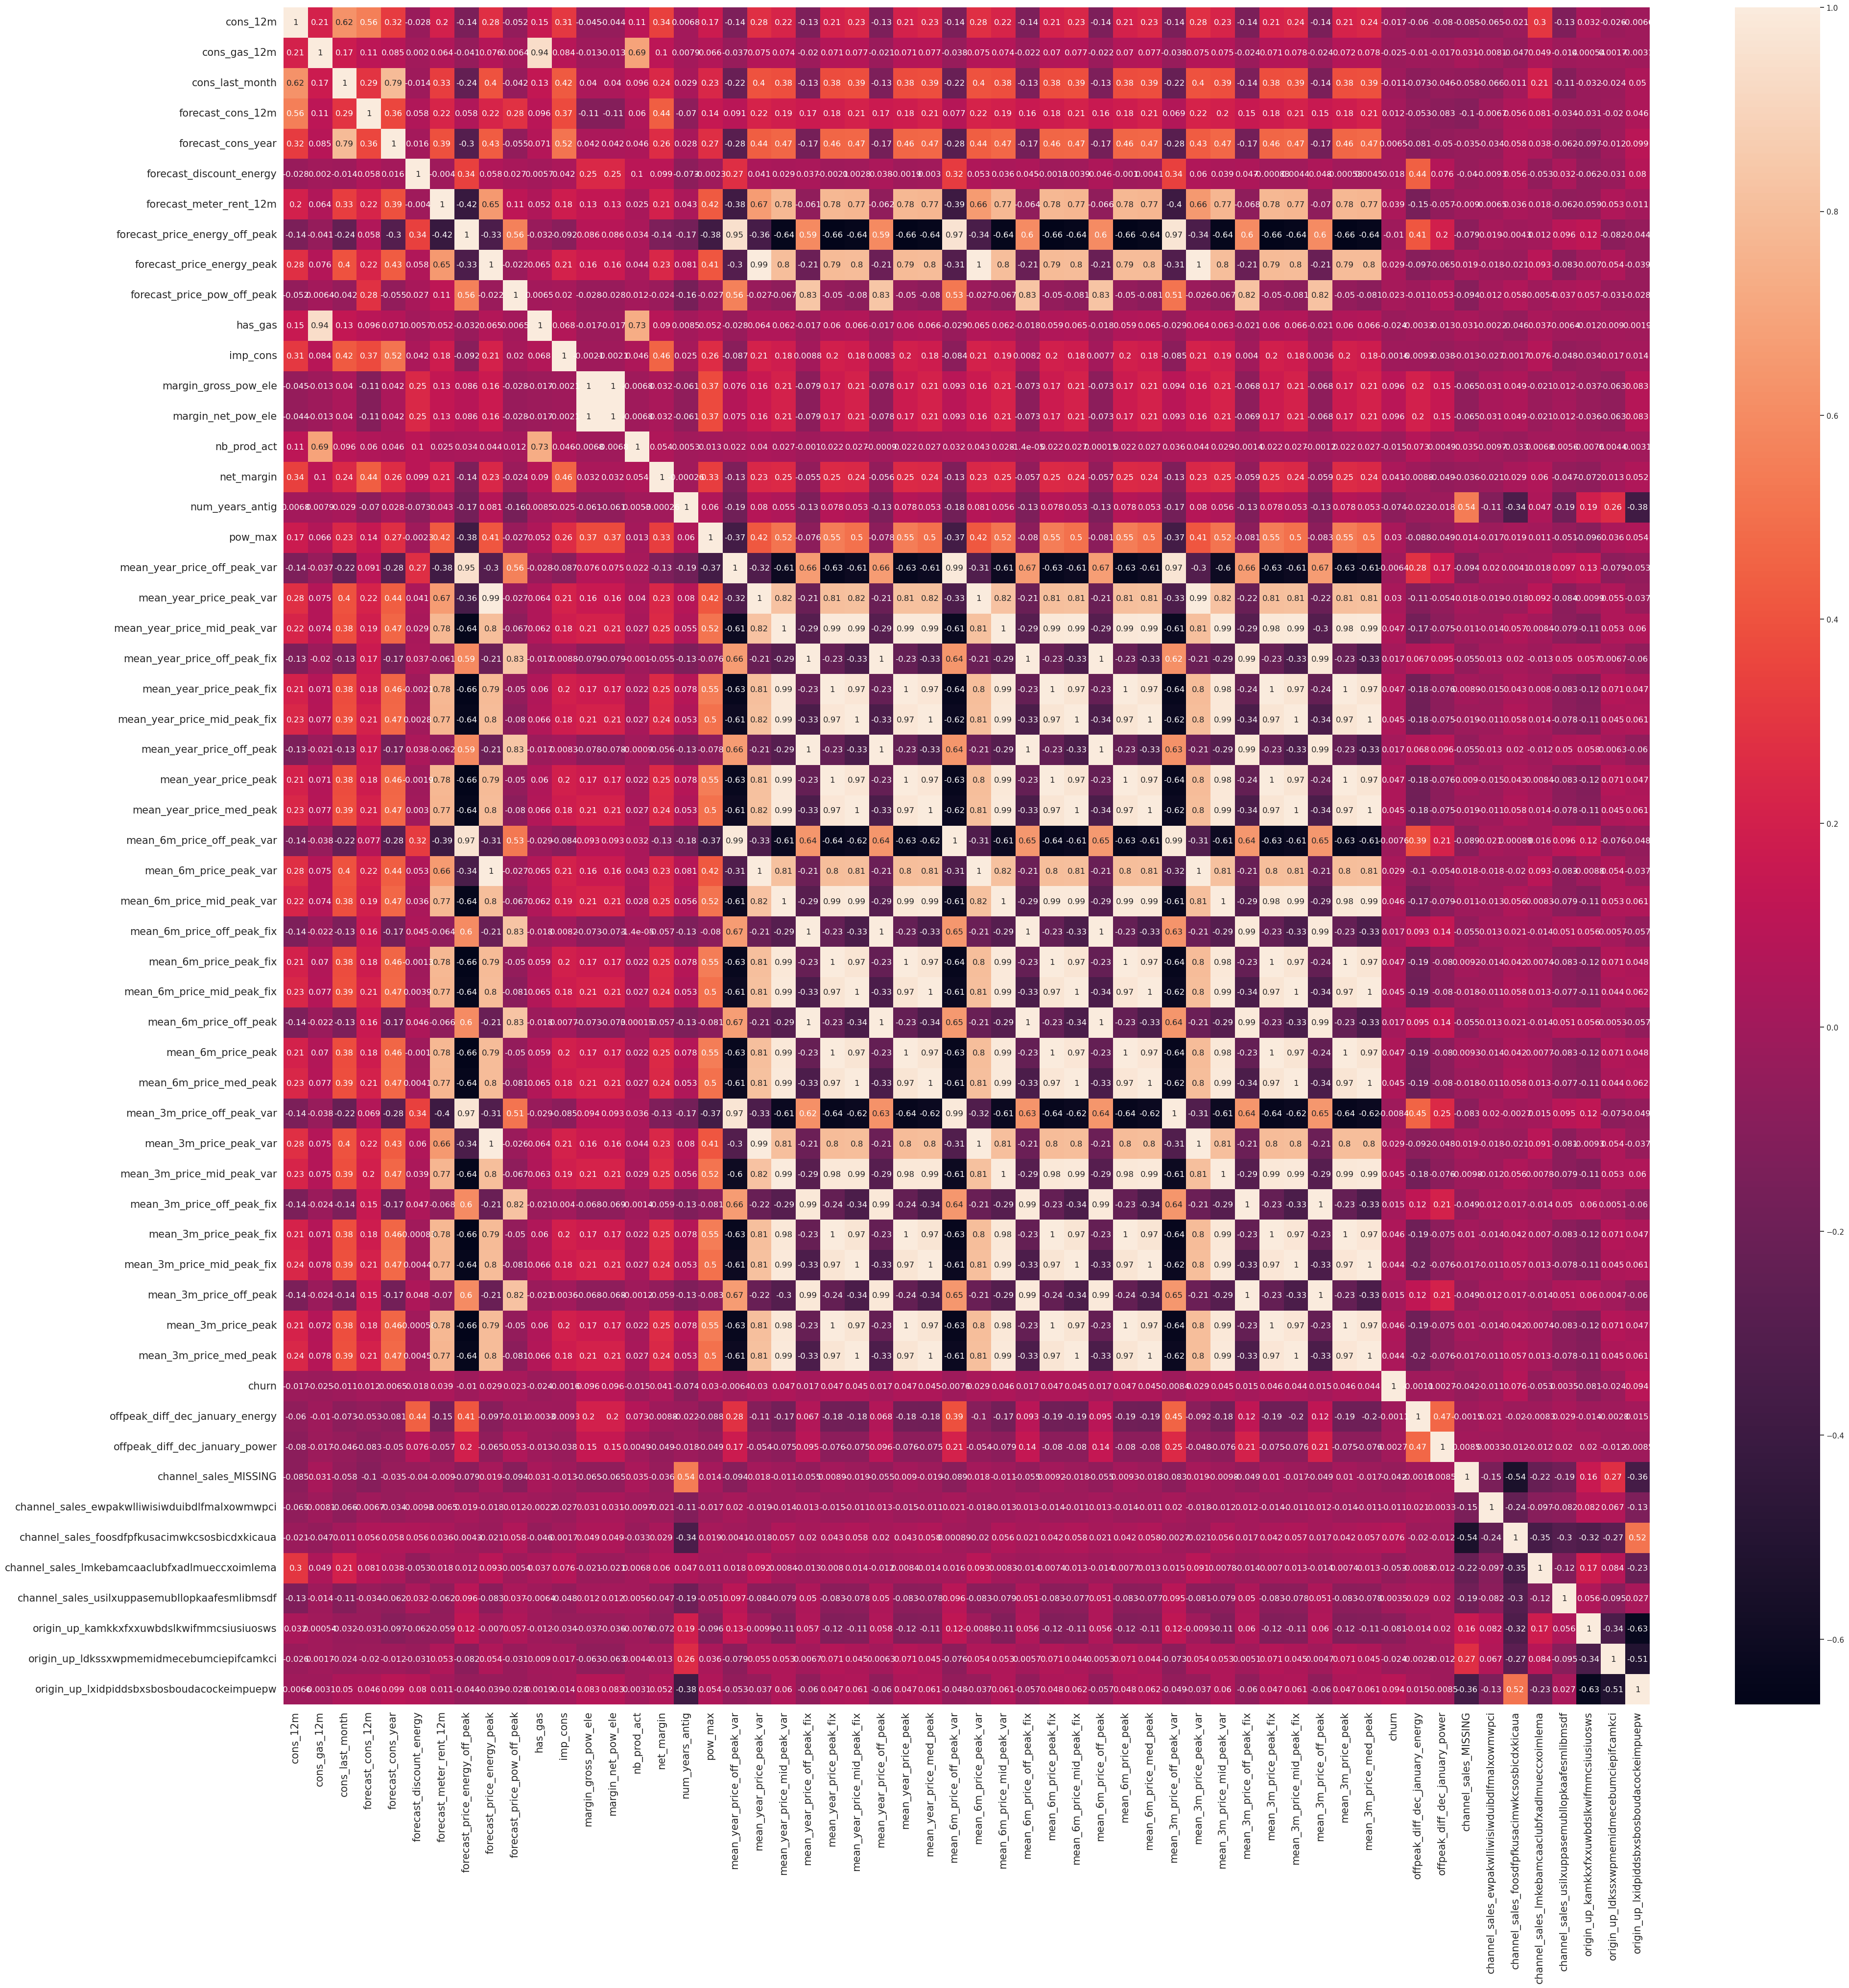

In [84]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

I will remove some variables which exhibit a high correlation with other independent features.

In [85]:
df = df.drop(columns=['mean_year_price_mid_peak_var', 'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix', 
                      'mean_year_price_peak', 'mean_year_price_med_peak', 'mean_6m_price_mid_peak_var', 
                      'mean_6m_price_peak_fix', 'mean_6m_price_mid_peak_fix', 'mean_6m_price_peak',
                      'mean_6m_price_med_peak', 'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix', 
                      'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix', 'mean_3m_price_peak', 'mean_3m_price_med_peak'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000     10.914124         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  8.446985      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.300786      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  7.368340      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  8.395252      0.000000         6.267201   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           5.252012            0.000000                       0.0   
2           3.891004            0.000000                       0.0   
3           5.484963            0.000000                       0.0   
4           6.101999            6.267201                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.022451                        0.108389   
1                 2.848971                        0.136025   
2                 3.681855                        0.153402   
3                 3.036394                        0.136883   
4                 4.888317                        0.110557   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_energy  \
0                    0.093620  ...                         0.020057   
1                    0.000000  ...                        -0.003767   
2                    0.084248  ...                        -0.004670   
3                    0.000000  ...                        -0.004547   
4                    0.095324  ...                        -0.006192   

   offpeak_diff_dec_january_power  channel_sales_MISSING  \
0                        3.700961                      0   
1                        0.177779                      1   
2                        0.177779                      0   
3                        0.177779                      0   
4                        0.162916                      1   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1       

## Building Prediction Models

### Split the Data

We need to split the dataset into training dataset and testing dataset. We will use train_test_slit from sklearn package to split the data into 70% for training and hold back 30% for testing.

In [86]:
# Separate target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [87]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10223
Test cases: 4382


In [88]:
y.value_counts()

0    13186
1     1419
Name: churn, dtype: int64

We can see that the number of churn and not churn is imbalanced. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique to solve the this problem

In [89]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [90]:
#check the number of target variable after oversampling using SMOTE
from collections import Counter
print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({1: 13186, 0: 13186})


It can be seen that the distrubtion of Churn status are now balanced.

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10223, 39)
(10223,)
(4382, 39)
(4382,)


### Logistic Regression

In [92]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [93]:
y_pred = model.predict(X_test)

In [94]:
#Let's check the accuracy of the predictions 
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9094020994979461


Text(109.44999999999997, 0.5, 'Actual')

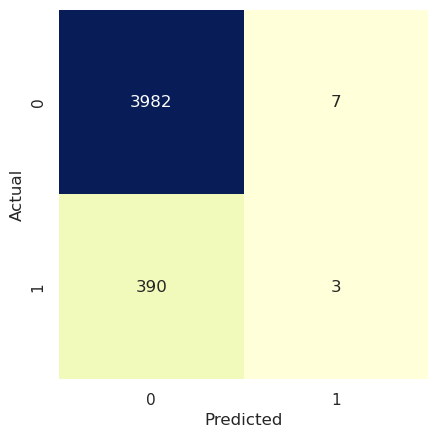

In [95]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [96]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 3
False positives: 7
True negatives: 3982
False negatives: 390



In [97]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3989
           1       0.30      0.01      0.01       393

    accuracy                           0.91      4382
   macro avg       0.61      0.50      0.48      4382
weighted avg       0.86      0.91      0.87      4382



In [98]:
# retrieve the precision_score and recall_score metrics
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))

Overall Precision: 0.3
Overall Recall: 0.007633587786259542


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [99]:
y_scores = model.predict_proba(X_test)
print(y_scores[:10])

[[0.8583048  0.1416952 ]
 [0.92735346 0.07264654]
 [0.92428168 0.07571832]
 [0.91868835 0.08131165]
 [0.7475733  0.2524267 ]
 [0.8827091  0.1172909 ]
 [0.9433609  0.0566391 ]
 [0.93859919 0.06140081]
 [0.91500061 0.08499939]
 [0.89275022 0.10724978]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

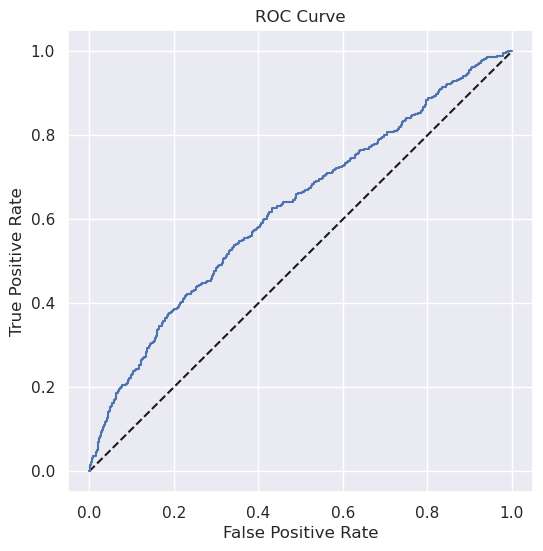

In [100]:
from sklearn.metrics import roc_curve
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [101]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6235002490946796


* Looking at the true negatives, we have 3981 out of 3989. This means that out of all the negative cases (churn = 0), we predicted 3981 as negative (hence the name True negative). This is great!

* Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is too high at 390, but we want to get the false negatives to as close to 0 as we can.

* Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 8, quite good.

* With the true positives, we can see that in total we have 393 clients that churned in the test dataset. However, we are only able to correctly identify 3 of those 393, which is very poor.

* Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

* Looking at the precision score and recall score, this shows us a score of 0.27 and 0.02 which are very bad. This is not a good model.

#### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


True positives: 23
False positives: 6
True negatives: 3983
False negatives: 370

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      3989
           1       0.79      0.06      0.11       393

    accuracy                           0.91      4382
   macro avg       0.85      0.53      0.53      4382
weighted avg       0.90      0.91      0.88      4382

Accuracy: 0.9141944317663168
Overall Precision: 0.7931034482758621
Overall Recall: 0.058524173027989825

AUC: 0.6813769673217124


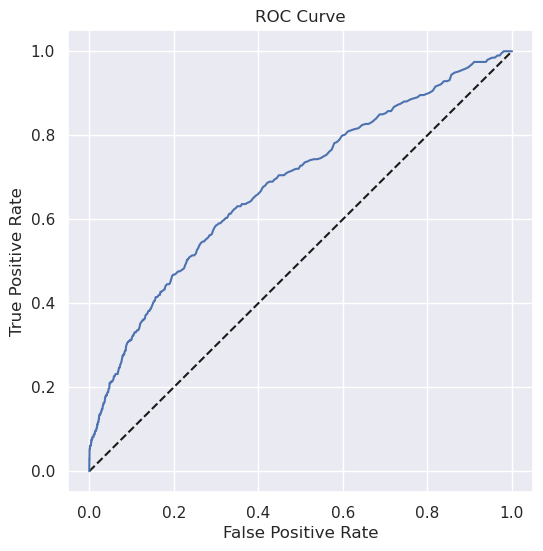

In [103]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred_RF))

print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

* Looking at the true negatives, we have 3984 out of 3989. This is great!

* Looking at the false negatives, 371 is too high but better than Logistic Model.

* Looking at false positives, we can see there are only , quite good.

* With the true positives, we correctly identify 22 of those 393, which is very poor.

* Looking at the accuracy score, this is very misleading, looking at the precision score and recall score, this shows us a score of 0.81 which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

* The AUC is better a little bit comparing with Logistic Regression.

### Model Understanding

Feature importances indicate the importance of a feature within the predictive model.

In [104]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

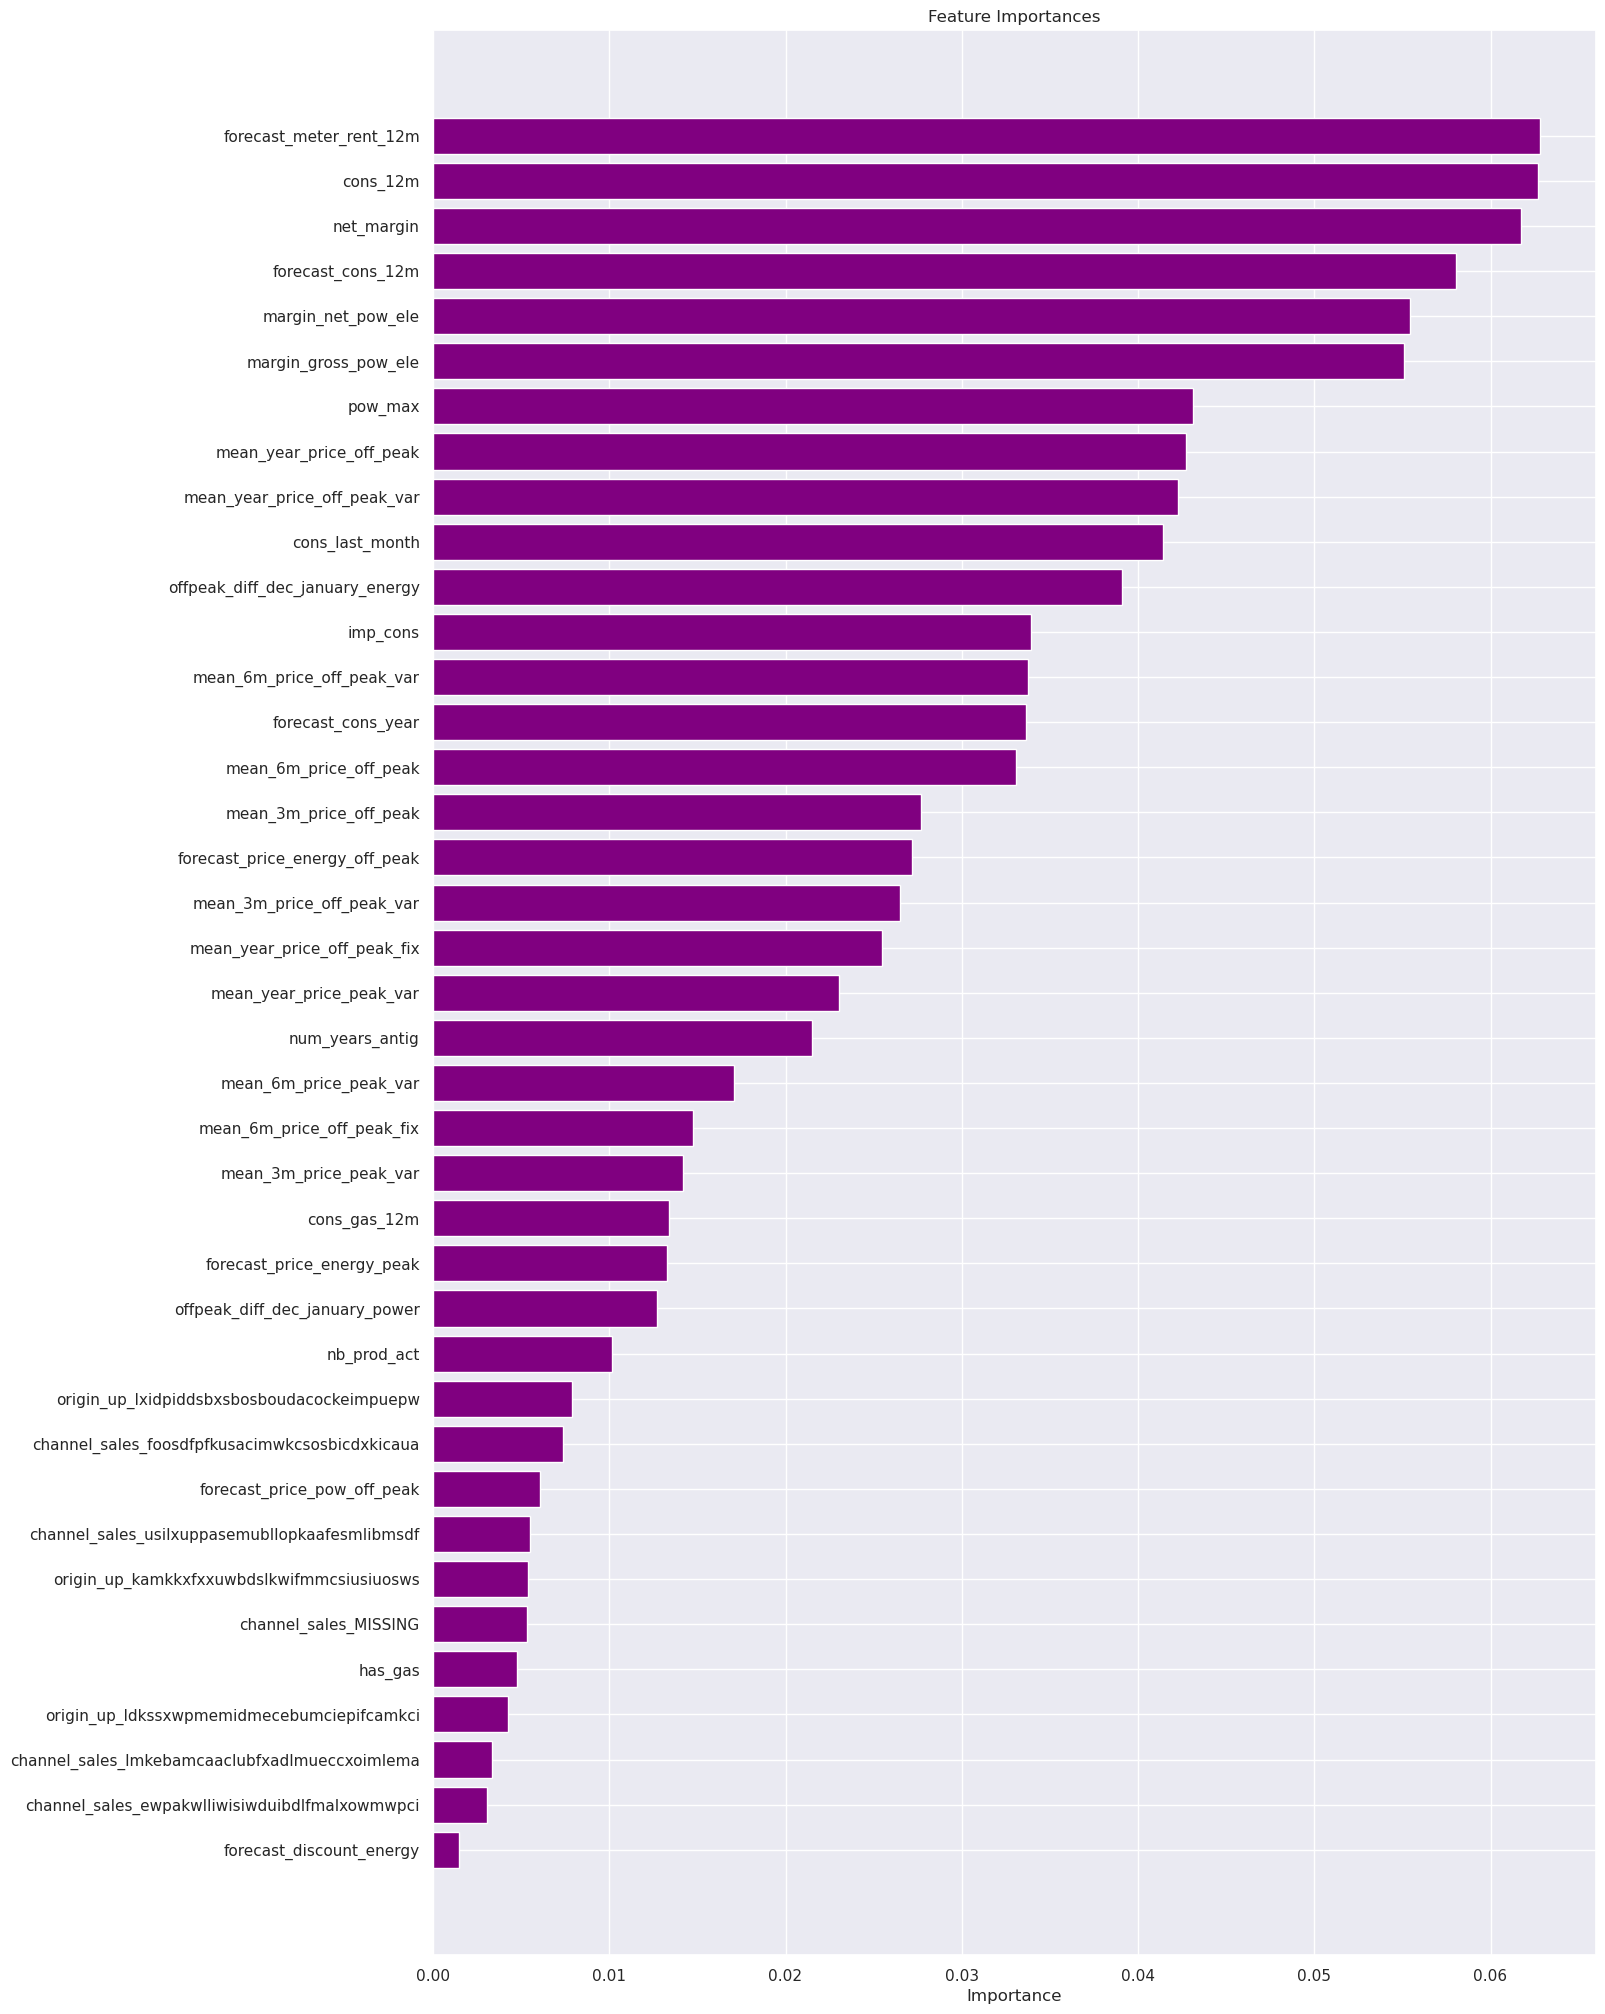

In [105]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

* Consumption over 12 months and forecast meter rent 12 month are a top driver for churn in this model
* Net margin also plays an important role in the predictive model.
* Our price sensitivity features are scattered around but are not the main driver for a customer churning

In [106]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [107]:
y_scores = model_RF.predict_proba(X_test)
probabilities = y_scores[:, 1]

In [108]:
X_test['churn'] = y_pred_RF.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('data_with_predictions.csv')

Now let's save our trained model so we can use it again later.

In [109]:
import joblib

# Save the model as a pickle file
filename = 'powerco_churn_model.pkl'
joblib.dump(model_RF, filename)

['powerco_churn_model.pkl']